In [1]:
import pandas as pd
import os 
import numpy as np

# DataViz
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

# 2 clusters_separately:

## Cluster 0:

In [2]:
import pandas as pd
df = pd.read_excel("/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/NM_Work/Interpretations of clusters tables/annotationed_data_2clusters0_arranged.xlsx")
print(df)

    Length    OD    ID    WT    R1  R1.1  R1.2  R1.3  R1.4  R1.5  ...  6.19  \
0    14.81  5.35  4.10  1.00  1.76  2.08  2.40  2.66  3.18  3.44  ...  9.57   
1    16.88  6.30  5.02  0.82  1.33  1.75  1.97  2.35  2.50  3.16  ...  7.27   
2    17.60  5.54  4.84  0.95  1.26  1.56  1.78  2.16  2.39  2.96  ...  7.59   
3    17.09  6.31  5.43  0.76  1.20  1.63  1.87  2.15  2.42  2.97  ...  6.90   
4    15.17  5.31  4.45  0.78  1.67  1.89  2.26  2.46  3.04  3.16  ...  9.84   
5    15.68  5.89  4.90  0.96  1.61  1.86  2.09  2.40  2.88  3.18  ...  7.71   
6    16.79  6.71  5.10  0.79  1.29  1.70  2.03  2.39  2.53  2.70  ...  6.73   
7    20.45  6.14  4.97  0.99  0.67  1.10  1.53  1.74  2.12  2.31  ...  5.10   
8    16.24  4.91  3.50  1.03  1.65  1.98  2.39  2.65  3.44  3.95  ...  9.43   
9    16.82  4.25  3.91  0.93  1.42  1.66  1.80  2.52  2.67  3.24  ...  9.15   
10   16.38  5.01  4.51  0.72  1.44  1.68  1.88  2.23  2.78  3.20  ...  8.95   
11   16.60  6.10  5.02  0.86  1.39  1.77  2.02  2.36

In [3]:
df.head()

,Length,OD,ID,WT,R1,R1.1,R1.2,R1.3,R1.4,R1.5,...,6.19,6.20,6.21,6.22,6.23,6.24,6.25,6.26,6.27,cluster
0,14.81,5.35,4.10,1.00,1.76,2.08,2.40,2.66,3.18,3.44,...,9.57,9.88,7.97,8.61,9.45,10.31,11.15,12.01,11.94,0
1,16.88,6.30,5.02,0.82,1.33,1.75,1.97,2.35,2.50,3.16,...,7.27,8.13,5.58,6.28,7.05,7.91,8.86,9.86,10.41,0
2,17.60,5.54,4.84,0.95,1.26,1.56,1.78,2.16,2.39,2.96,...,7.59,7.98,6.29,7.05,7.84,8.79,9.74,10.02,10.52,0
3,17.09,6.31,5.43,0.76,1.20,1.63,1.87,2.15,2.42,2.97,...,6.90,7.72,5.32,5.97,6.70,7.54,8.52,9.54,10.04,0
4,15.17,5.31,4.45,0.78,1.67,1.89,2.26,2.46,3.04,3.16,...,9.84,9.83,8.00,8.74,9.65,10.53,11.42,12.08,12.13,0


<AxesSubplot:>

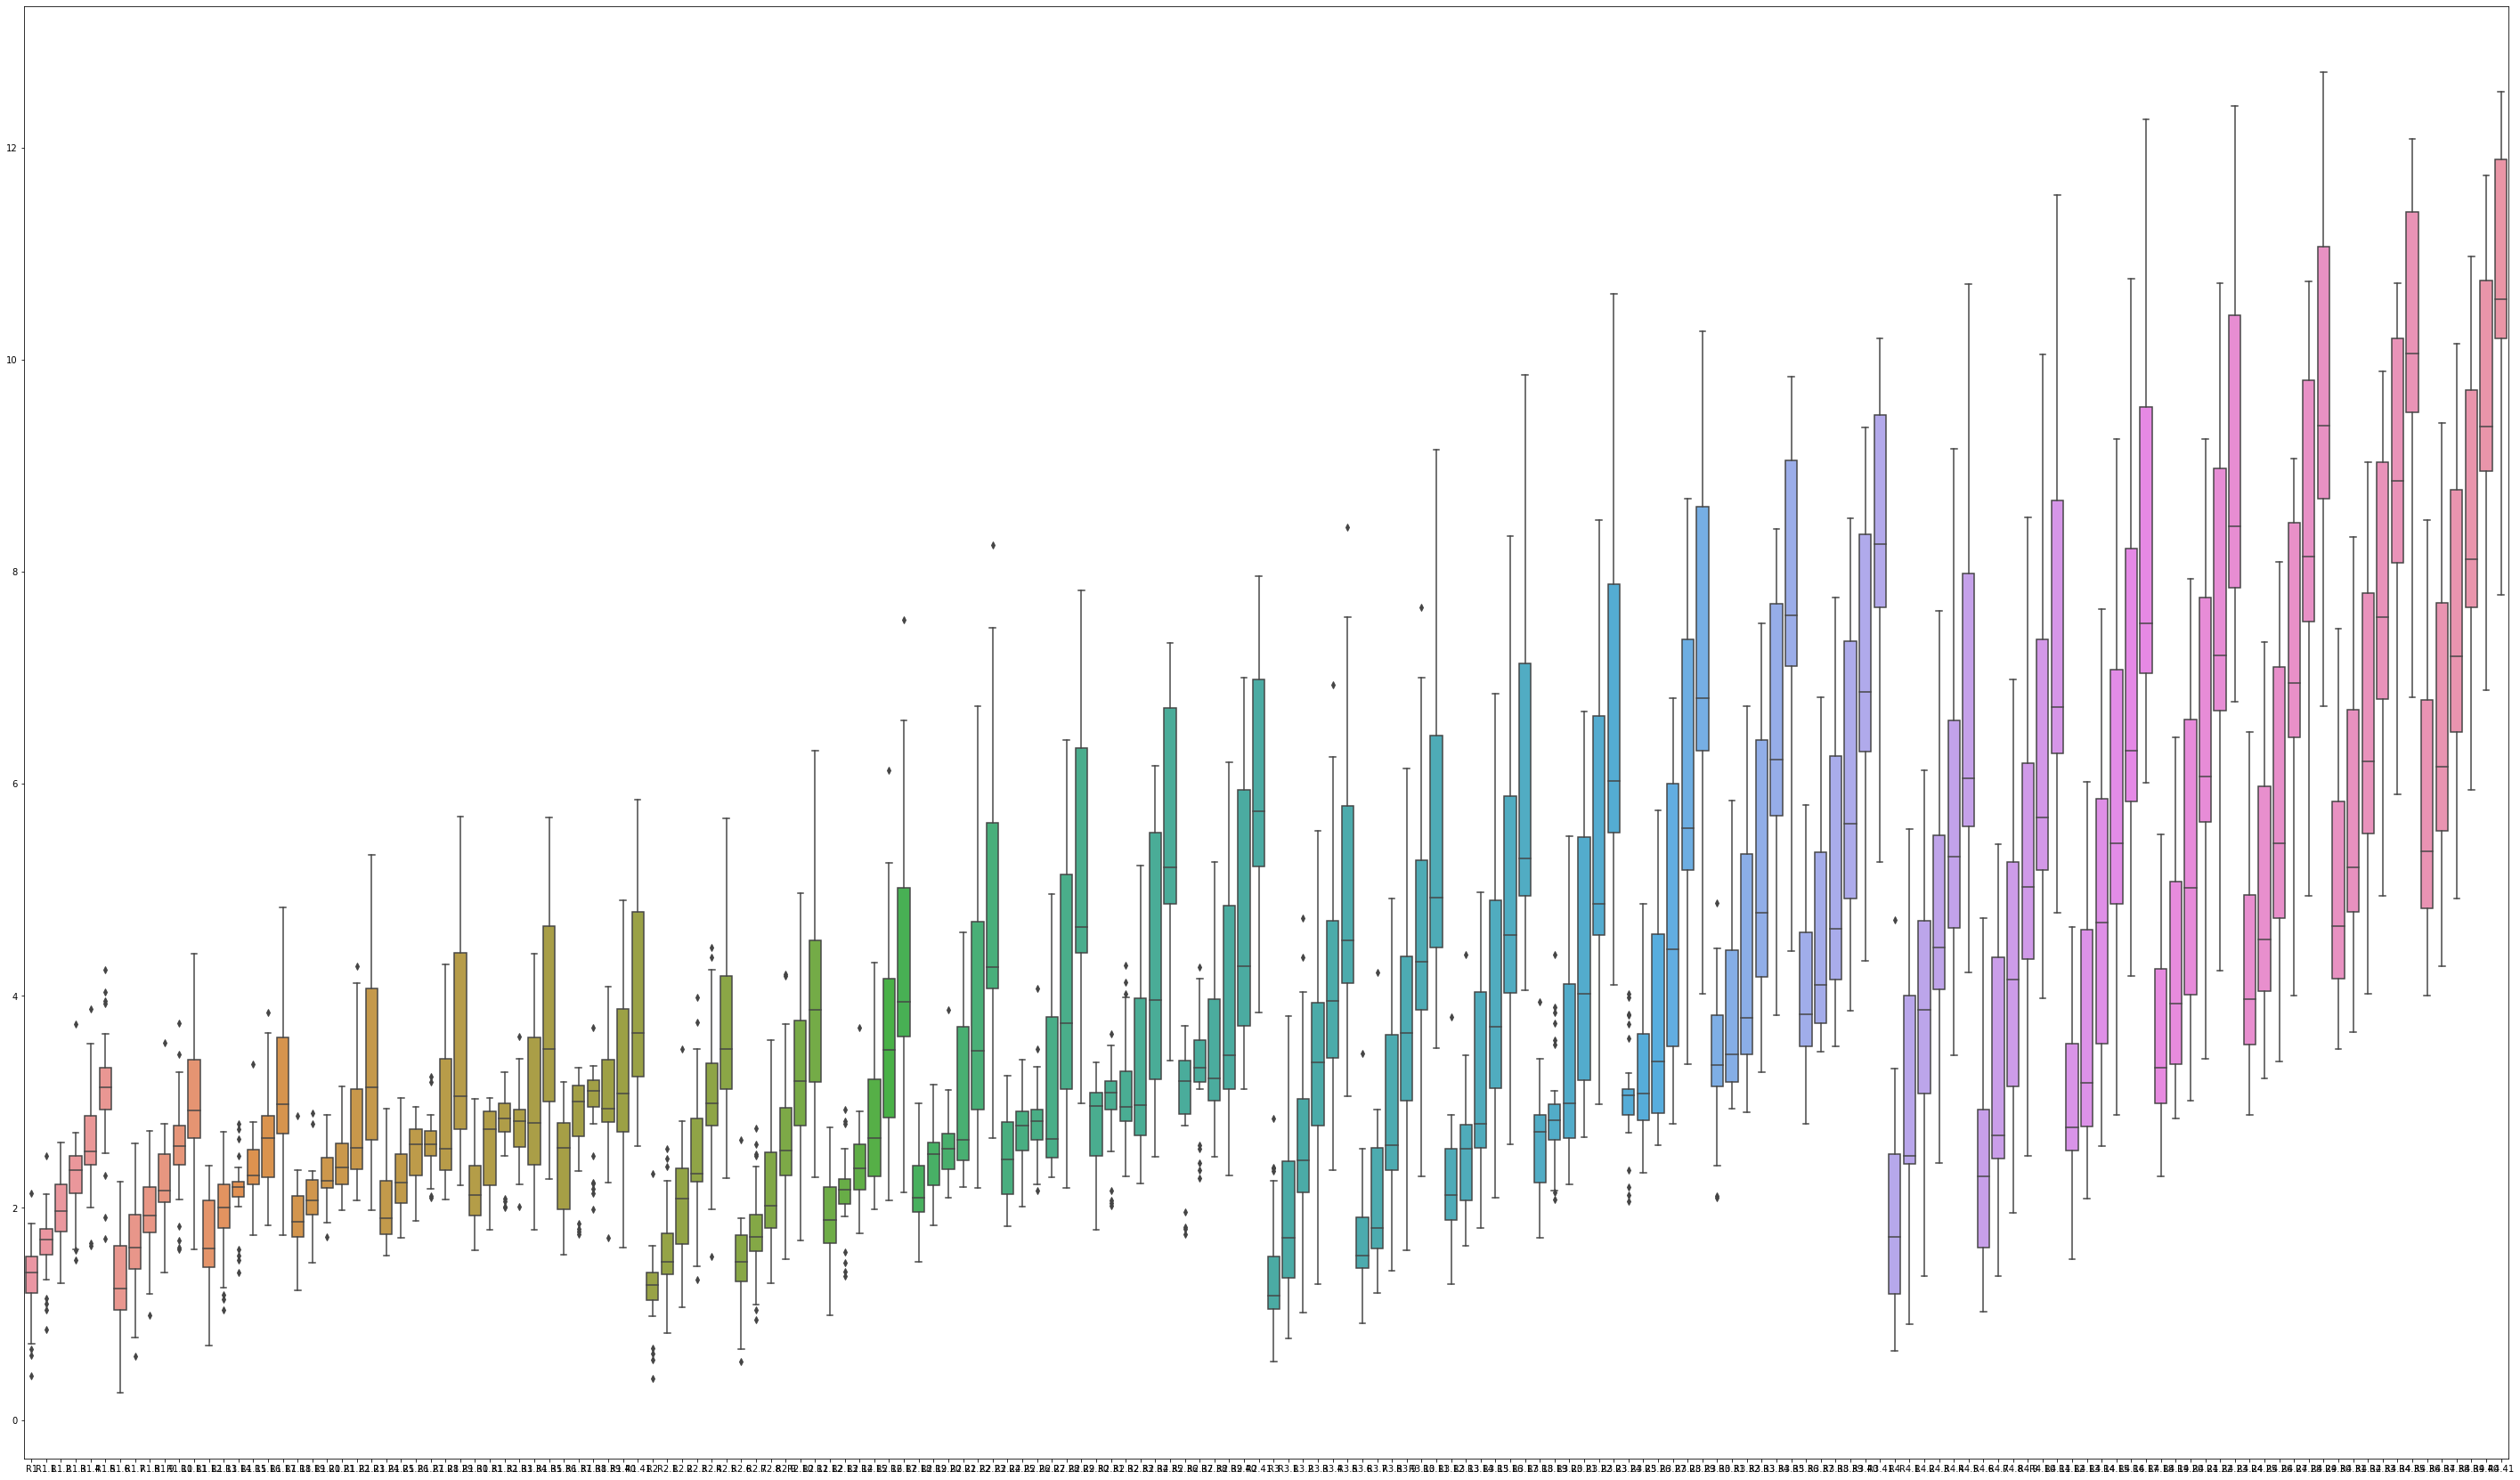

In [4]:
plt.figure(figsize=(50, 30))
sns.boxplot( data=df.iloc[:, 4:172])
# add stripplot
# ax = sns.stripplot(data=df[df, color="orange", jitter=0.2, size=2.5)
# # add title
# plt.title("Boxplot with jitter", loc="left")

# Annotated features:

In [5]:
import pandas as pd
df1 = pd.read_excel("/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/NM_Work/Interpretations of clusters tables/annotationed_data_2clusters0_arranged.xlsx")
print(df1)

    Length    OD    ID    WT    R1  R1.1  R1.2  R1.3  R1.4  R1.5  ...  6.19  \
0    14.81  5.35  4.10  1.00  1.76  2.08  2.40  2.66  3.18  3.44  ...  9.57   
1    16.88  6.30  5.02  0.82  1.33  1.75  1.97  2.35  2.50  3.16  ...  7.27   
2    17.60  5.54  4.84  0.95  1.26  1.56  1.78  2.16  2.39  2.96  ...  7.59   
3    17.09  6.31  5.43  0.76  1.20  1.63  1.87  2.15  2.42  2.97  ...  6.90   
4    15.17  5.31  4.45  0.78  1.67  1.89  2.26  2.46  3.04  3.16  ...  9.84   
5    15.68  5.89  4.90  0.96  1.61  1.86  2.09  2.40  2.88  3.18  ...  7.71   
6    16.79  6.71  5.10  0.79  1.29  1.70  2.03  2.39  2.53  2.70  ...  6.73   
7    20.45  6.14  4.97  0.99  0.67  1.10  1.53  1.74  2.12  2.31  ...  5.10   
8    16.24  4.91  3.50  1.03  1.65  1.98  2.39  2.65  3.44  3.95  ...  9.43   
9    16.82  4.25  3.91  0.93  1.42  1.66  1.80  2.52  2.67  3.24  ...  9.15   
10   16.38  5.01  4.51  0.72  1.44  1.68  1.88  2.23  2.78  3.20  ...  8.95   
11   16.60  6.10  5.02  0.86  1.39  1.77  2.02  2.36

In [6]:
df1.head()

,Length,OD,ID,WT,R1,R1.1,R1.2,R1.3,R1.4,R1.5,...,6.19,6.20,6.21,6.22,6.23,6.24,6.25,6.26,6.27,cluster
0,14.81,5.35,4.10,1.00,1.76,2.08,2.40,2.66,3.18,3.44,...,9.57,9.88,7.97,8.61,9.45,10.31,11.15,12.01,11.94,0
1,16.88,6.30,5.02,0.82,1.33,1.75,1.97,2.35,2.50,3.16,...,7.27,8.13,5.58,6.28,7.05,7.91,8.86,9.86,10.41,0
2,17.60,5.54,4.84,0.95,1.26,1.56,1.78,2.16,2.39,2.96,...,7.59,7.98,6.29,7.05,7.84,8.79,9.74,10.02,10.52,0
3,17.09,6.31,5.43,0.76,1.20,1.63,1.87,2.15,2.42,2.97,...,6.90,7.72,5.32,5.97,6.70,7.54,8.52,9.54,10.04,0
4,15.17,5.31,4.45,0.78,1.67,1.89,2.26,2.46,3.04,3.16,...,9.84,9.83,8.00,8.74,9.65,10.53,11.42,12.08,12.13,0


In [7]:
# iterating the columns
for col in df1.columns:
    print(col)

Length
OD
ID
WT
R1
R1.1
R1.2
R1.3
R1.4
R1.5
R1.6
R1.7
R1.8
R1.9
R1.10
R1.11
R1.12
R1.13
R1.14
R1.15
R1.16
R1.17
R1.18
R1.19
R1.20
R1.21
R1.22
R1.23
R1.24
R1.25
R1.26
R1.27
R1.28
R1.29
R1.30
R1.31
R1.32
R1.33
R1.34
R1.35
R1.36
R1.37
R1.38
R1.39
R1.40
R1.41
R2
R2.1
R2.2
R2.3
R2.4
R2.5
R2.6
R2.7
R2.8
R2.9
R2.10
R2.11
R2.12
R2.13
R2.14
R2.15
R2.16
R2.17
R2.18
R2.19
R2.20
R2.21
R2.22
R2.23
R2.24
R2.25
R2.26
R2.27
R2.28
R2.29
R2.30
R2.31
R2.32
R2.33
R2.34
R2.35
R2.36
R2.37
R2.38
R2.39
R2.40
R2.41
R3
R3.1
R3.2
R3.3
R3.4
R3.5
R3.6
R3.7
R3.8
R3.9
R3.10
R3.11
R3.12
R3.13
R3.14
R3.15
R3.16
R3.17
R3.18
R3.19
R3.20
R3.21
R3.22
R3.23
R3.24
R3.25
R3.26
R3.27
R3.28
R3.29
R3.30
R3.31
R3.32
R3.33
R3.34
R3.35
R3.36
R3.37
R3.38
R3.39
R3.40
R3.41
R4
R4.1
R4.2
R4.3
R4.4
R4.5
R4.6
R4.7
R4.8
R4.9
R4.10
R4.11
R4.12
R4.13
R4.14
R4.15
R4.16
R4.17
R4.18
R4.19
R4.20
R4.21
R4.22
R4.23
R4.24
R4.25
R4.26
R4.27
R4.28
R4.29
R4.30
R4.31
R4.32
R4.33
R4.34
R4.35
R4.36
R4.37
R4.38
R4.39
R4.40
R4.41
P2
P2.1
P2.2
P2.3
P2.4
P

In [8]:
# split the data into inputs and outputs
R = df1.iloc[:, 4:172].values
P = df1.iloc[:, 172:340].values
DOD = df1.iloc[:, 340:508].values

In [9]:
R1 = df1.iloc[:, 4:46].values
R2 = df1.iloc[:, 46:88].values
R3 = df1.iloc[:, 88:130].values
R4 = df1.iloc[:, 130:172].values

In [10]:
R

array([[ 1.76,  2.08,  2.4 , ...,  9.68, 10.73, 11.94],
       [ 1.33,  1.75,  1.97, ...,  7.58,  8.93, 10.41],
       [ 1.26,  1.56,  1.78, ...,  8.45,  9.5 , 10.52],
       ...,
       [ 1.43,  1.79,  2.04, ...,  8.12,  9.37, 10.77],
       [ 1.32,  1.64,  1.86, ...,  8.32,  9.37, 10.44],
       [ 1.57,  1.8 ,  2.06, ..., 10.16, 11.13, 12.28]])

In [11]:
P

array([[ 1.76,  2.08,  2.4 , ...,  9.68, 10.73, 11.94],
       [ 1.33,  1.75,  1.97, ...,  7.58,  8.93, 10.41],
       [ 1.26,  1.56,  1.78, ...,  8.45,  9.5 , 10.52],
       ...,
       [ 1.43,  1.79,  2.04, ...,  8.12,  9.37, 10.77],
       [ 1.32,  1.64,  1.86, ...,  8.32,  9.37, 10.44],
       [ 1.57,  1.8 ,  2.06, ..., 10.16, 11.13, 12.28]])

In [12]:
DOD

array([[ 1.76,  1.89,  2.12, ..., 11.15, 12.01, 11.94],
       [ 1.33,  1.11,  1.48, ...,  8.86,  9.86, 10.41],
       [ 1.26,  1.2 ,  1.65, ...,  9.74, 10.02, 10.52],
       ...,
       [ 1.43,  1.25,  1.62, ...,  9.38, 10.37, 10.77],
       [ 1.32,  1.24,  1.66, ...,  9.52, 10.4 , 10.44],
       [ 1.57,  1.75,  2.11, ..., 11.65, 11.89, 12.28]])

In [13]:
df1['avg_R1'] = df1.iloc[:, 4:46].values.mean(axis=1)
df1['avg_R2'] = df1.iloc[:, 46:88].values.mean(axis=1)
df1['avg_R3'] = df1.iloc[:, 88:130].values.mean(axis=1)
df1['avg_R4'] = df1.iloc[:, 130:172].values.mean(axis=1)

In [14]:
df1['avg_P2'] = df1.iloc[:, 172:196].values.mean(axis=1)
df1['avg_P4'] = df1.iloc[:, 196:220].values.mean(axis=1)
df1['avg_P6'] = df1.iloc[:, 220:244].values.mean(axis=1)
df1['avg_P8'] = df1.iloc[:, 244:268].values.mean(axis=1)
df1['avg_P10'] = df1.iloc[:, 268:292].values.mean(axis=1)
df1['avg_P12'] = df1.iloc[:, 292:316].values.mean(axis=1)
df1['avg_P14'] = df1.iloc[:, 316:340].values.mean(axis=1)

In [15]:
df1['avg_DOD3.5'] = df1.iloc[:, 340:368].values.mean(axis=1)
df1['avg_DOD4'] = df1.iloc[:, 368:396].values.mean(axis=1)
df1['avg_DOD4.5'] = df1.iloc[:, 396:424].values.mean(axis=1)
df1['avg_DOD5'] = df1.iloc[:, 424:452].values.mean(axis=1)
df1['avg_DOD5.5'] = df1.iloc[:, 452:480].values.mean(axis=1)
df1['avg_DOD6'] = df1.iloc[:, 480:508].values.mean(axis=1)


In [16]:
df1.head()

,Length,OD,ID,WT,R1,R1.1,R1.2,R1.3,R1.4,R1.5,...,avg_P8,avg_P10,avg_P12,avg_P14,avg_DOD3.5,avg_DOD4,avg_DOD4.5,avg_DOD5,avg_DOD5.5,avg_DOD6
0,14.81,5.35,4.10,1.00,1.76,2.08,2.40,2.66,3.18,3.44,...,4.815000,5.282083,5.795000,6.284167,3.311429,3.777857,4.306071,5.051786,6.046786,7.100714
1,16.88,6.30,5.02,0.82,1.33,1.75,1.97,2.35,2.50,3.16,...,3.450000,3.841250,4.313750,4.776667,2.328214,2.714643,3.096429,3.619643,4.305000,5.267857
2,17.60,5.54,4.84,0.95,1.26,1.56,1.78,2.16,2.39,2.96,...,3.646667,4.106667,4.515833,5.064583,2.395000,2.779286,3.305000,3.874286,4.563929,5.501071
3,17.09,6.31,5.43,0.76,1.20,1.63,1.87,2.15,2.42,2.97,...,3.341250,3.735417,4.213750,4.650417,2.256429,2.599286,2.980714,3.517143,4.159643,5.030714
4,15.17,5.31,4.45,0.78,1.67,1.89,2.26,2.46,3.04,3.16,...,4.734583,5.296250,5.804583,6.287500,3.099643,3.623929,4.233571,4.947500,5.947143,7.013214


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


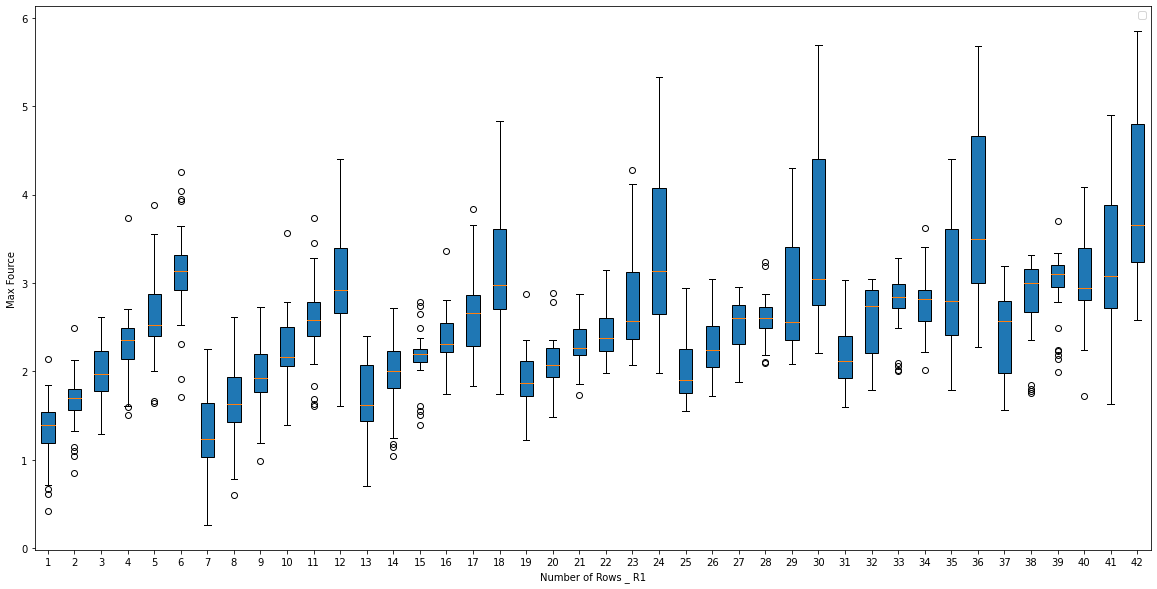

In [17]:
plt.figure(figsize=(20, 10))

plt.boxplot(R1,vert=True,patch_artist=True);   
plt.xlabel('Number of Rows _ R1')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


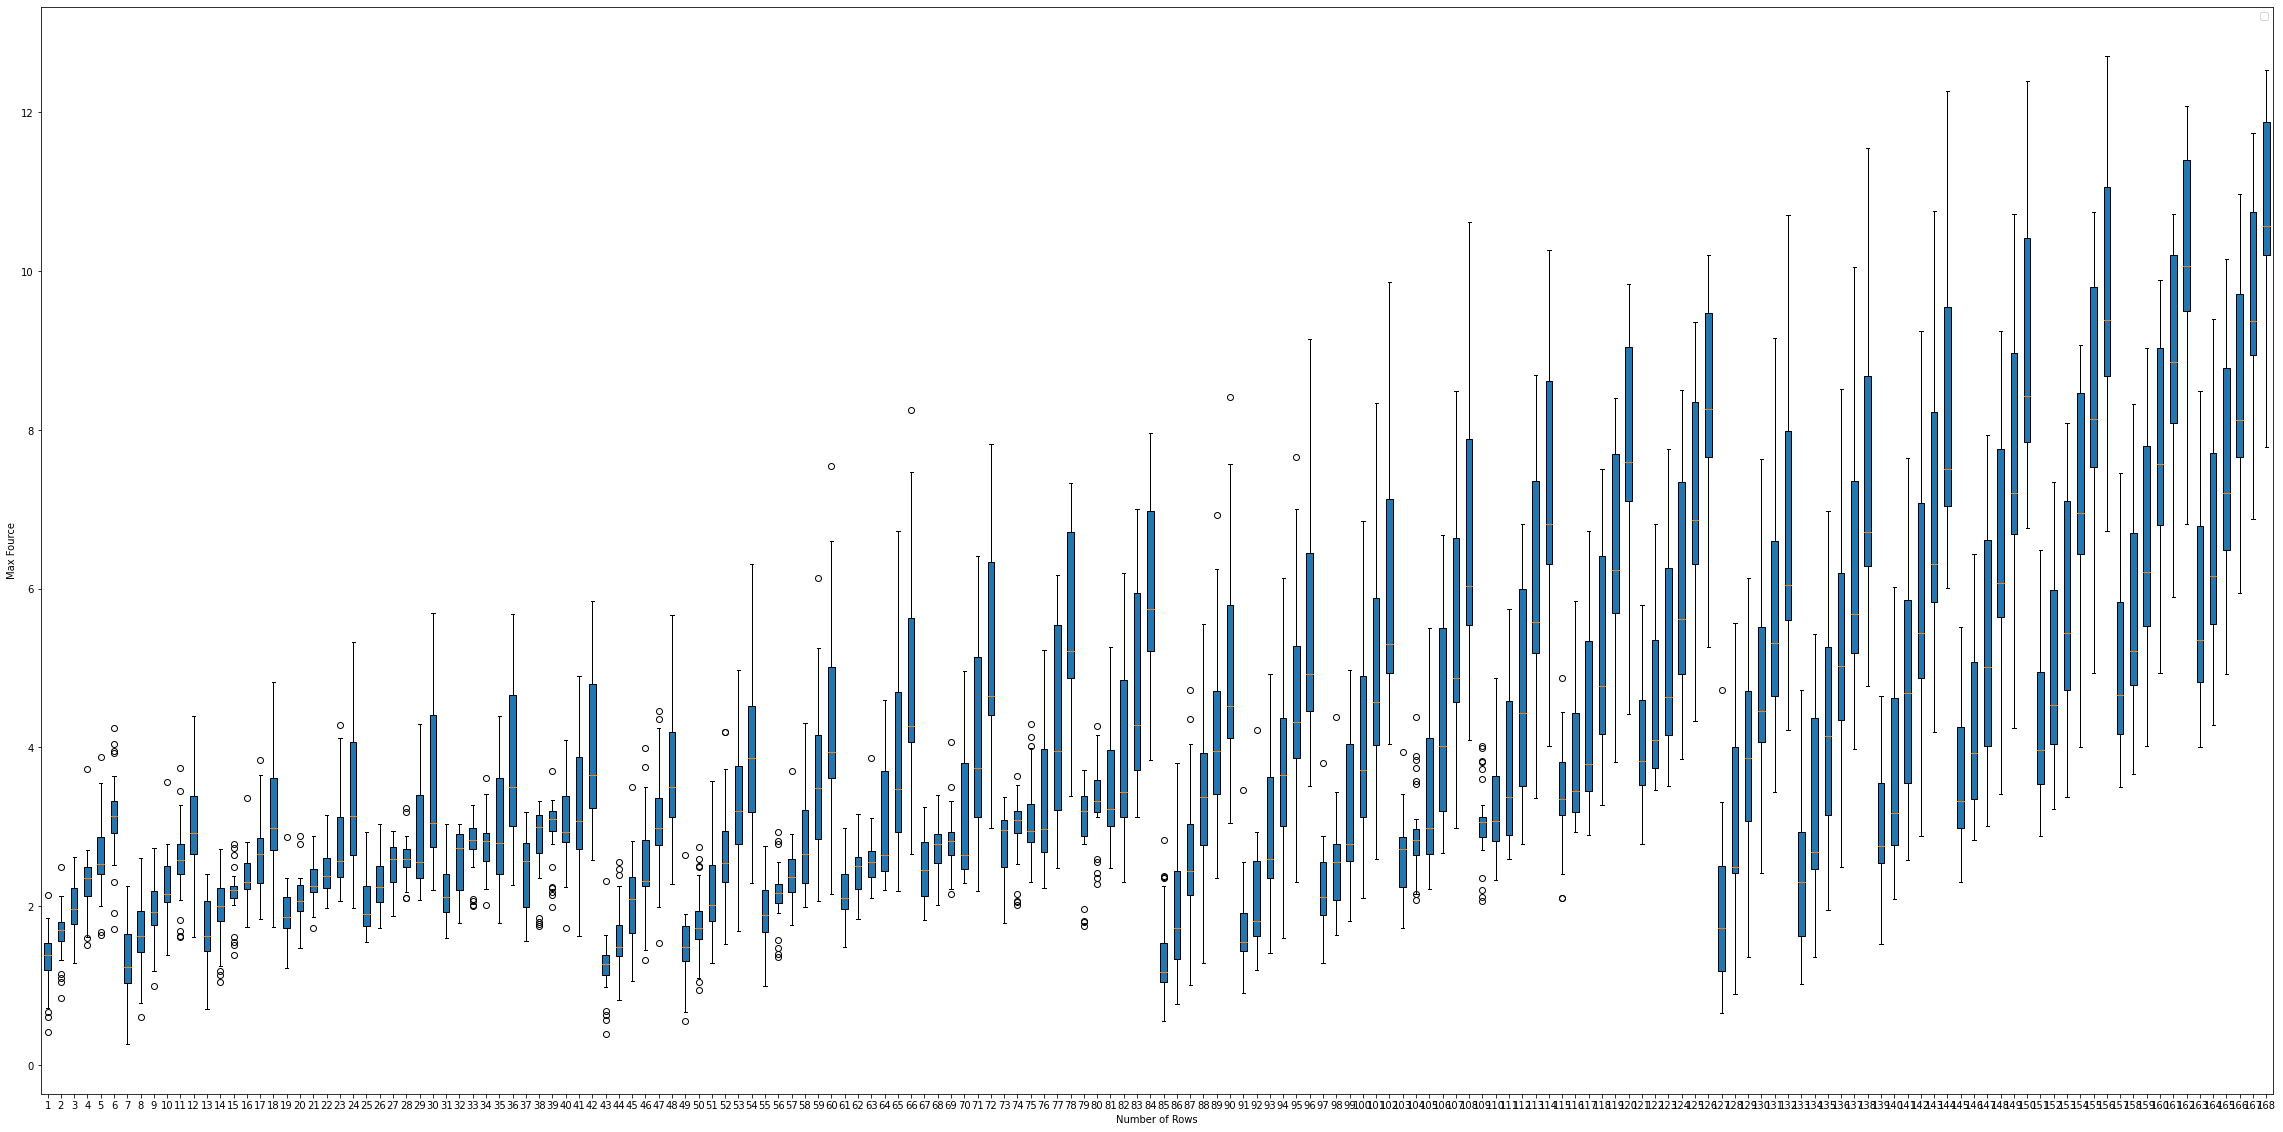

In [18]:
plt.figure(figsize=(40, 20))

plt.boxplot(R,vert=True,patch_artist=True);   
plt.xlabel('Number of Rows')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


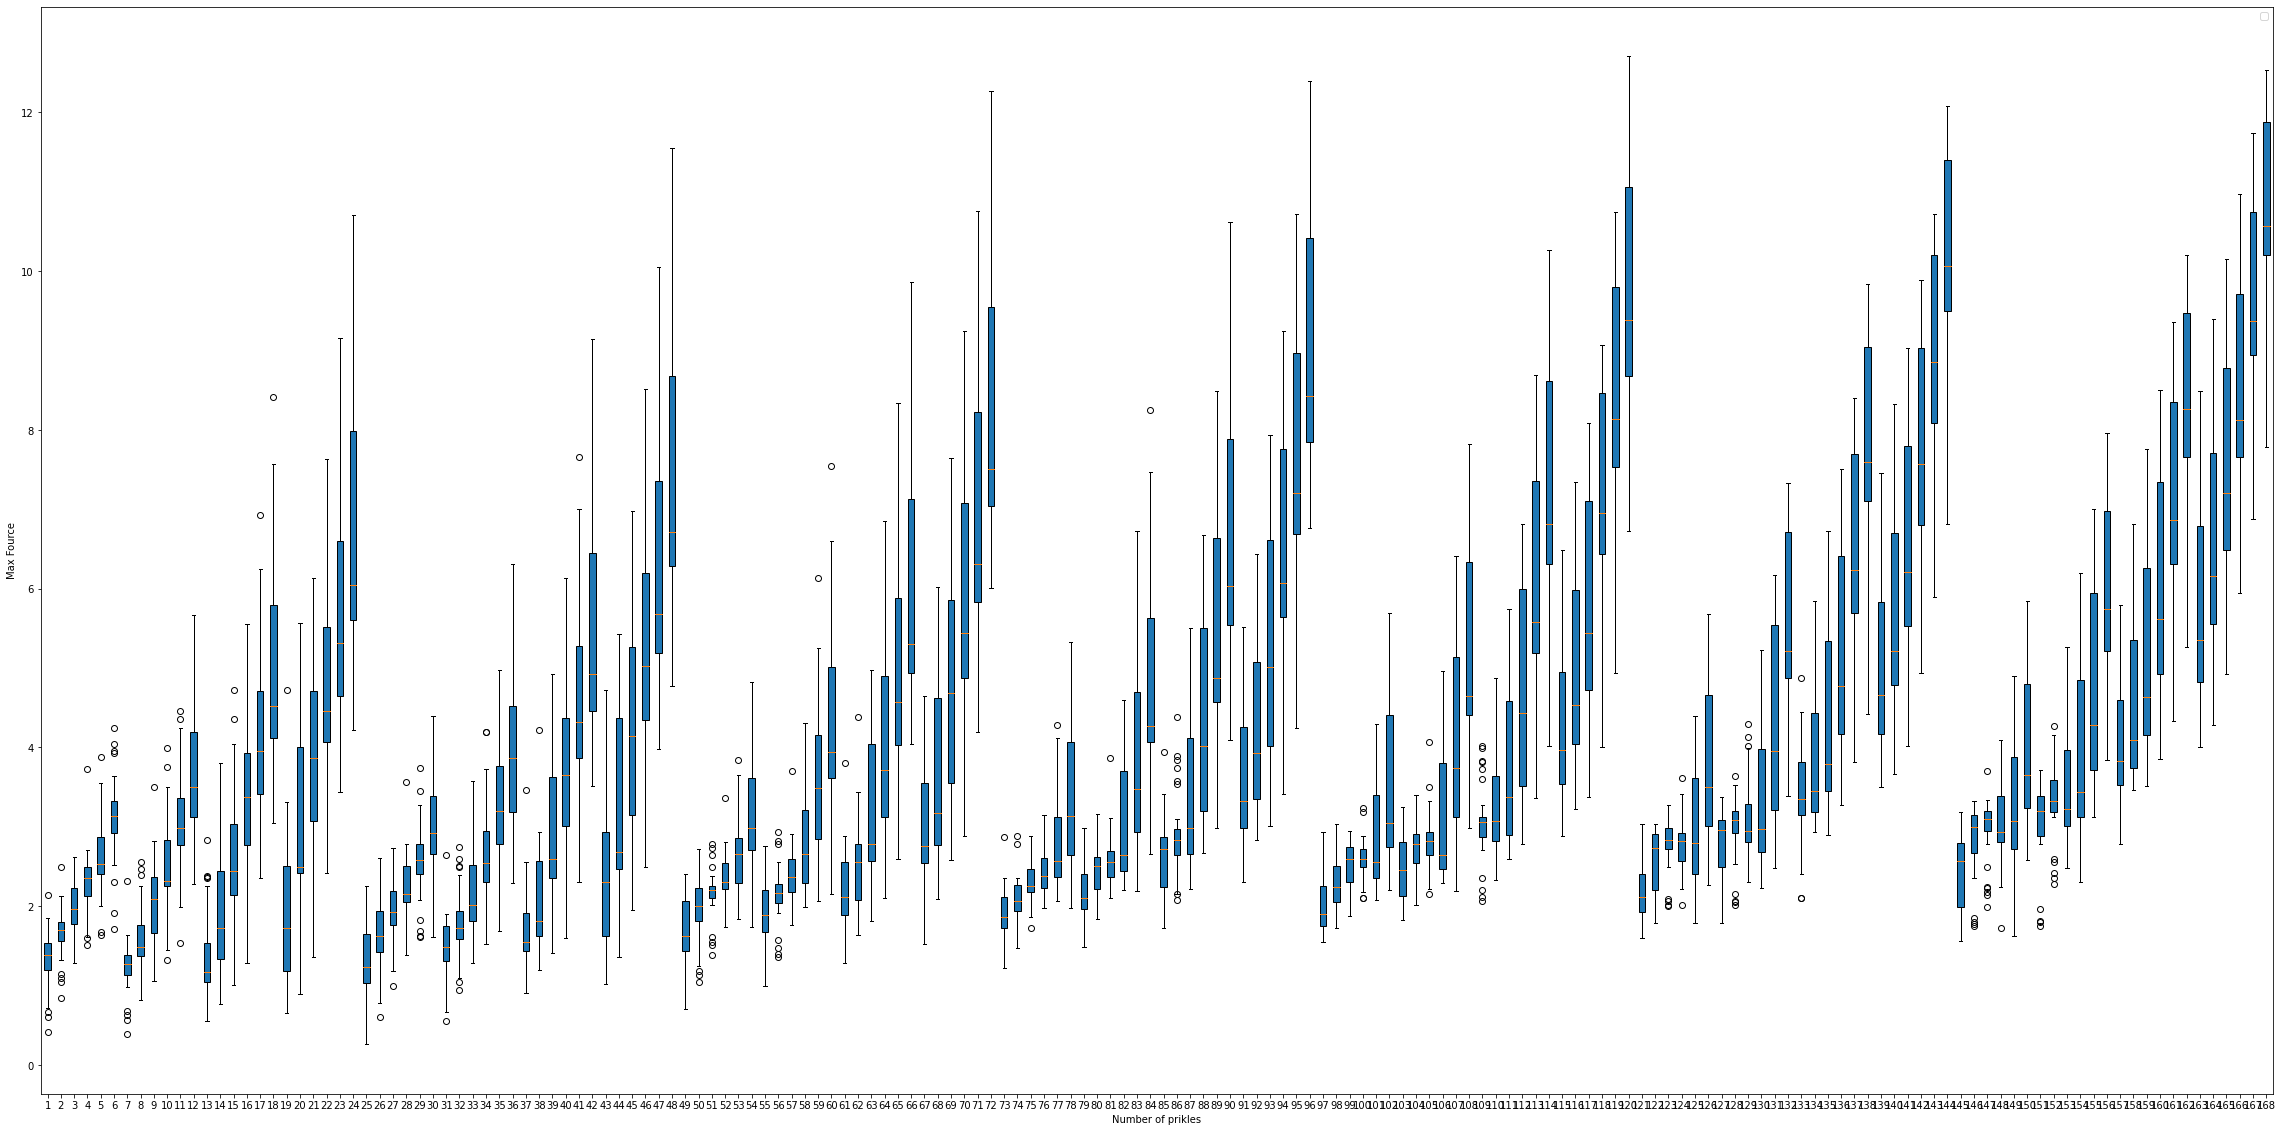

In [19]:
plt.figure(figsize=(40, 20))

plt.boxplot(P,vert=True,patch_artist=True);   
plt.xlabel('Number of prikles')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


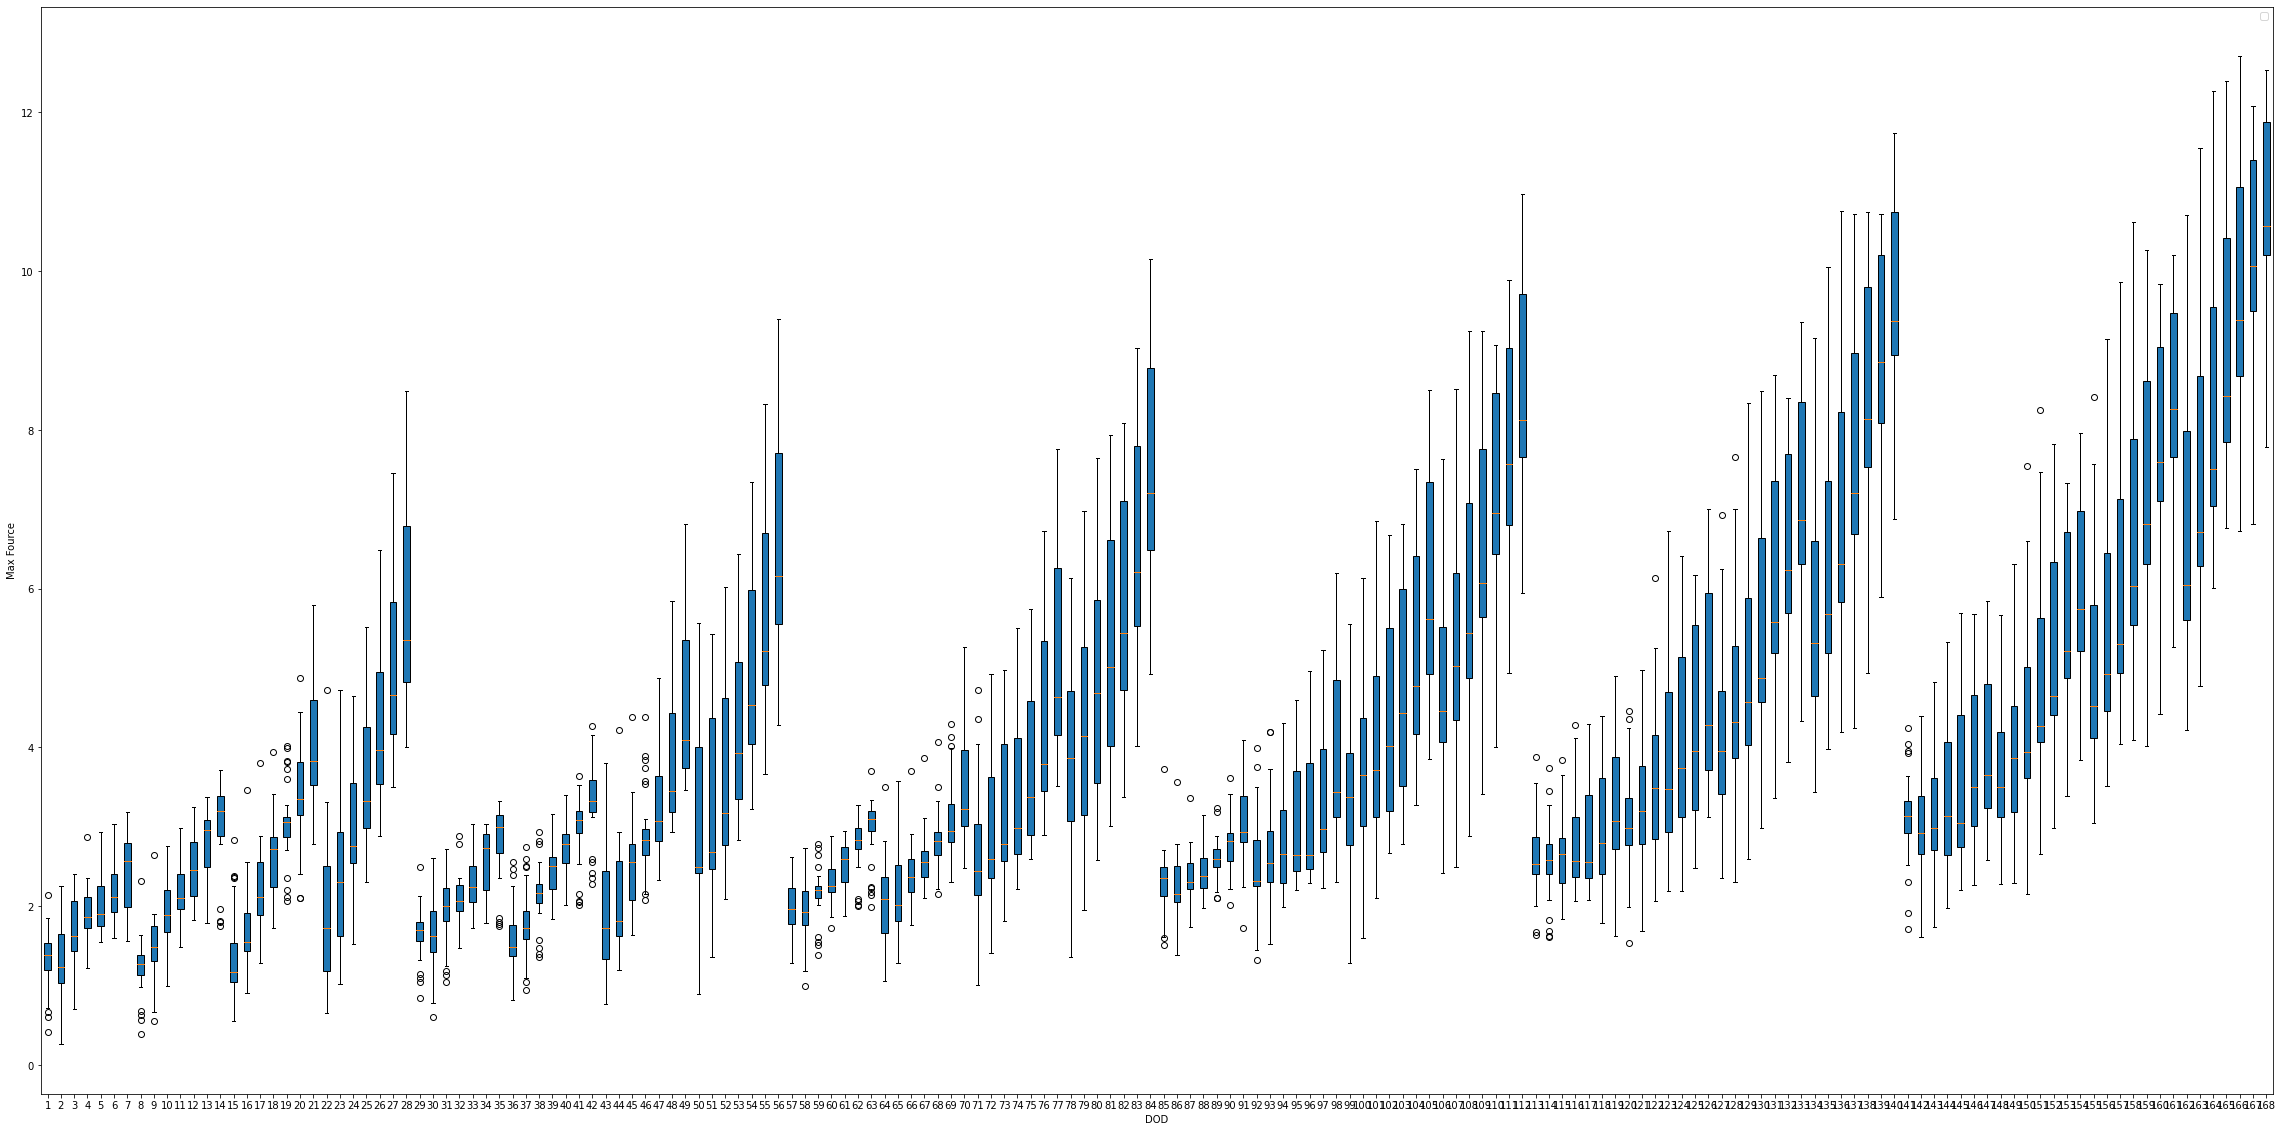

In [20]:
plt.figure(figsize=(40, 20))

plt.boxplot(DOD,vert=True,patch_artist=True);   
plt.xlabel('DOD')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

In [21]:
df1_avg = df1.drop(df1.iloc[:, 4:508], axis=1)
df1_avg.head()

,Length,OD,ID,WT,cluster,avg_R1,avg_R2,avg_R3,avg_R4,avg_P2,...,avg_P8,avg_P10,avg_P12,avg_P14,avg_DOD3.5,avg_DOD4,avg_DOD4.5,avg_DOD5,avg_DOD5.5,avg_DOD6
0,14.81,5.35,4.10,1.00,0,2.983810,3.920714,5.462381,7.362857,3.846667,...,4.815000,5.282083,5.795000,6.284167,3.311429,3.777857,4.306071,5.051786,6.046786,7.100714
1,16.88,6.30,5.02,0.82,0,2.392143,2.830952,3.710952,5.287143,2.625000,...,3.450000,3.841250,4.313750,4.776667,2.328214,2.714643,3.096429,3.619643,4.305000,5.267857
2,17.60,5.54,4.84,0.95,0,2.324286,2.825952,3.918333,5.877143,2.630000,...,3.646667,4.106667,4.515833,5.064583,2.395000,2.779286,3.305000,3.874286,4.563929,5.501071
3,17.09,6.31,5.43,0.76,0,2.327619,2.755238,3.561429,5.051667,2.433750,...,3.341250,3.735417,4.213750,4.650417,2.256429,2.599286,2.980714,3.517143,4.159643,5.030714
4,15.17,5.31,4.45,0.78,0,2.848333,3.665476,5.252143,7.477381,3.483333,...,4.734583,5.296250,5.804583,6.287500,3.099643,3.623929,4.233571,4.947500,5.947143,7.013214


In [22]:
df1_just_avg = df1.drop(df1.iloc[:, 3:508], axis=1)
df1_just_avg = df1_just_avg.drop(df1.iloc[:, 0:1], axis=1)

df1_just_avg.head()

,OD,ID,cluster,avg_R1,avg_R2,avg_R3,avg_R4,avg_P2,avg_P4,avg_P6,avg_P8,avg_P10,avg_P12,avg_P14,avg_DOD3.5,avg_DOD4,avg_DOD4.5,avg_DOD5,avg_DOD5.5,avg_DOD6
0,5.35,4.10,0,2.983810,3.920714,5.462381,7.362857,3.846667,4.072917,4.431250,4.815000,5.282083,5.795000,6.284167,3.311429,3.777857,4.306071,5.051786,6.046786,7.100714
1,6.30,5.02,0,2.392143,2.830952,3.710952,5.287143,2.625000,2.755833,3.124583,3.450000,3.841250,4.313750,4.776667,2.328214,2.714643,3.096429,3.619643,4.305000,5.267857
2,5.54,4.84,0,2.324286,2.825952,3.918333,5.877143,2.630000,2.903750,3.287500,3.646667,4.106667,4.515833,5.064583,2.395000,2.779286,3.305000,3.874286,4.563929,5.501071
3,6.31,5.43,0,2.327619,2.755238,3.561429,5.051667,2.433750,2.599583,2.993750,3.341250,3.735417,4.213750,4.650417,2.256429,2.599286,2.980714,3.517143,4.159643,5.030714
4,5.31,4.45,0,2.848333,3.665476,5.252143,7.477381,3.483333,3.820000,4.249583,4.734583,5.296250,5.804583,6.287500,3.099643,3.623929,4.233571,4.947500,5.947143,7.013214


In [23]:
df1_just_avg.iloc[:, 3:7].values

array([[2.98380952, 3.92071429, 5.46238095, 7.36285714],
       [2.39214286, 2.83095238, 3.71095238, 5.28714286],
       [2.32428571, 2.82595238, 3.91833333, 5.87714286],
       [2.32761905, 2.7552381 , 3.56142857, 5.05166667],
       [2.84833333, 3.66547619, 5.25214286, 7.47738095],
       [2.51952381, 3.05404762, 4.19095238, 6.02      ],
       [2.32547619, 2.71595238, 3.49071429, 4.91833333],
       [1.89142857, 2.18190476, 2.84190476, 4.21404762],
       [3.10571429, 4.29928571, 6.06119048, 8.25166667],
       [2.84785714, 3.98190476, 5.9852381 , 8.40666667],
       [2.76880952, 3.58690476, 5.16095238, 7.46285714],
       [2.42047619, 2.88666667, 3.8652381 , 5.58928571],
       [3.19928571, 4.00761905, 4.89357143, 6.03666667],
       [2.27119048, 2.79071429, 3.77380952, 5.48261905],
       [2.60428571, 3.0602381 , 3.99761905, 5.35404762],
       [3.25238095, 4.39857143, 6.20095238, 8.37166667],
       [2.84571429, 3.57071429, 4.96880952, 7.11619048],
       [2.9147619 , 4.02119048,

In [24]:
df1_just_avg.iloc[:, 7:14].values

array([[3.84666667, 4.07291667, 4.43125   , 4.815     , 5.28208333,
        5.795     , 6.28416667],
       [2.625     , 2.75583333, 3.12458333, 3.45      , 3.84125   ,
        4.31375   , 4.77666667],
       [2.63      , 2.90375   , 3.2875    , 3.64666667, 4.10666667,
        4.51583333, 5.06458333],
       [2.43375   , 2.59958333, 2.99375   , 3.34125   , 3.73541667,
        4.21375   , 4.65041667],
       [3.48333333, 3.82      , 4.24958333, 4.73458333, 5.29625   ,
        5.80458333, 6.2875    ],
       [3.03583333, 3.25083333, 3.53791667, 3.83333333, 4.18083333,
        4.62875   , 5.15541667],
       [2.52166667, 2.64208333, 2.98583333, 3.2775    , 3.59125   ,
        4.01916667, 4.50083333],
       [1.91375   , 2.0325    , 2.39333333, 2.78583333, 3.07916667,
        3.38041667, 3.89125   ],
       [4.30833333, 4.63625   , 5.02375   , 5.5075    , 5.84541667,
        6.0025    , 6.6825    ],
       [3.87916667, 4.45333333, 4.98833333, 5.25333333, 5.44083333,
        6.11458333, 7.0

In [25]:
df1_just_avg.iloc[:, 14:20].values

array([[3.31142857, 3.77785714, 4.30607143, 5.05178571, 6.04678571,
        7.10071429],
       [2.32821429, 2.71464286, 3.09642857, 3.61964286, 4.305     ,
        5.26785714],
       [2.395     , 2.77928571, 3.305     , 3.87428571, 4.56392857,
        5.50107143],
       [2.25642857, 2.59928571, 2.98071429, 3.51714286, 4.15964286,
        5.03071429],
       [3.09964286, 3.62392857, 4.23357143, 4.9475    , 5.94714286,
        7.01321429],
       [2.72035714, 3.08285714, 3.53285714, 4.04142857, 4.72535714,
        5.57392857],
       [2.27178571, 2.65071429, 2.92214286, 3.37678571, 4.03642857,
        4.91785714],
       [1.64107143, 2.03071429, 2.39392857, 2.8325    , 3.47071429,
        4.325     ],
       [3.31642857, 4.00928571, 4.75857143, 5.66357143, 6.78392857,
        8.045     ],
       [3.42714286, 3.97785714, 4.65892857, 5.50071429, 6.53642857,
        7.73142857],
       [2.96107143, 3.48428571, 4.09785714, 4.89      , 5.93678571,
        7.09928571],
       [2.43071429, 2

In [26]:
df1_just_avg["avg_R"] = df1_just_avg.iloc[:, 3:7].values.mean(axis=1)
df1_just_avg["avg_P"] = df1_just_avg.iloc[:, 7:14].values.mean(axis=1)
df1_just_avg["avg_DOD"] = df1_just_avg.iloc[:, 14:20].values.mean(axis=1)

Text(0.0, 1.0, 'Boxplot with jitter')

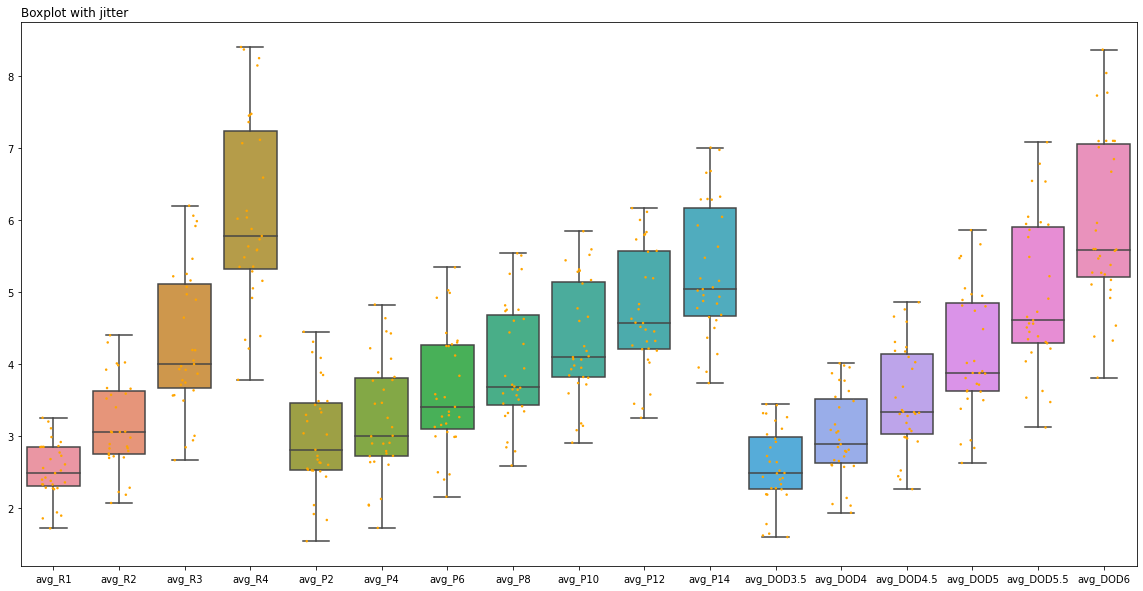

In [27]:
plt.figure(figsize=(20, 10))
sns.boxplot( data=df1_just_avg.iloc[:, 3:20])
# add stripplot
ax = sns.stripplot(data=df1_just_avg.iloc[:, 3:20], color="orange", jitter=0.2, size=2.5)
# add title
plt.title("Boxplot with jitter", loc="left")

Text(0.0, 1.0, 'Boxplot with jitter')

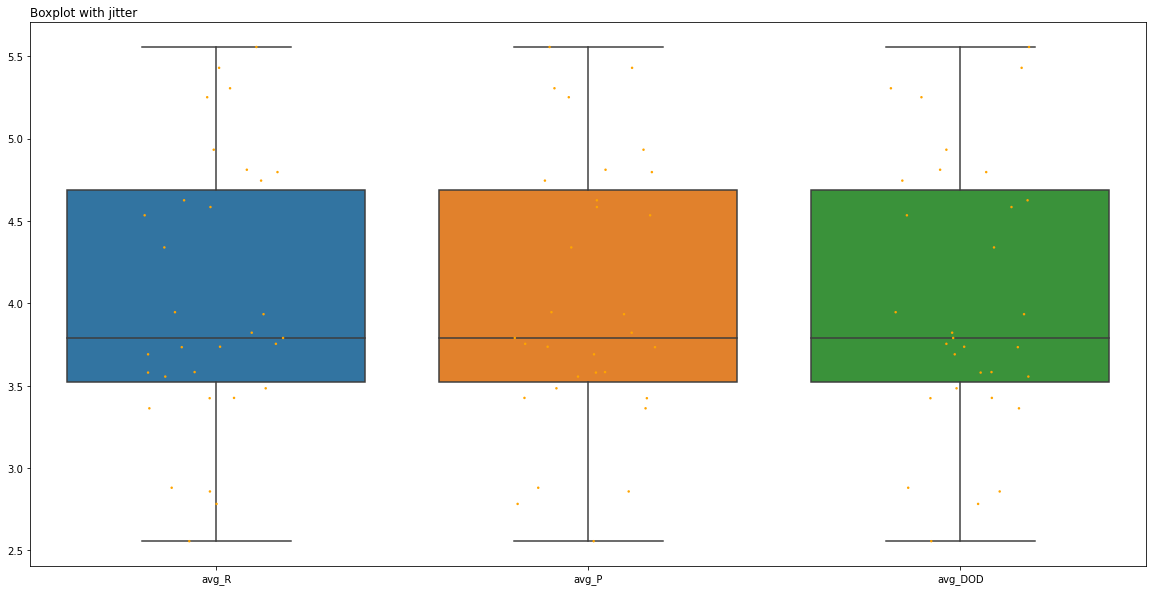

In [28]:
plt.figure(figsize=(20, 10))
sns.boxplot( data=df1_just_avg.iloc[:, 20:])
# add stripplot
ax = sns.stripplot(data=df1_just_avg.iloc[:, 20:], color="orange", jitter=0.2, size=2.5)
# add title
plt.title("Boxplot with jitter", loc="left")

## Cluster 1:

In [29]:
import pandas as pd
df1_1 = pd.read_excel("/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/NM_Work/Interpretations of clusters tables/annotationed_data_2clusters1_arranged.xlsx")
print(df1_1)

     Length    OD    ID    WT    R1  R1.1  R1.2  R1.3  R1.4  R1.5  ...   6.19  \
0     16.02  4.00  3.24  0.86  1.61  1.83  2.51  3.07  3.46  4.25  ...  10.30   
1     13.44  3.46  2.66  0.82  2.40  2.96  3.42  3.82  4.75  5.98  ...  12.08   
2     14.63  3.86  2.61  0.83  2.13  2.58  3.40  3.89  4.41  5.64  ...  11.41   
3     16.08  4.02  3.38  0.92  1.59  1.79  2.47  2.88  3.31  3.90  ...   9.98   
4     16.03  4.70  3.50  1.00  1.65  1.98  2.39  3.06  3.42  3.95  ...   9.49   
..      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
151   14.77  4.45  3.21  0.85  1.80  2.32  2.59  3.31  3.81  4.43  ...  10.74   
152   14.51  4.07  3.25  0.75  1.81  2.28  2.91  3.27  3.95  4.94  ...  11.06   
153   16.07  4.85  3.64  0.51  1.59  1.82  2.26  2.85  3.99  4.99  ...  10.42   
154   15.49  3.96  3.06  0.82  1.71  2.15  2.99  3.32  3.84  4.75  ...  10.75   
155   15.89  4.73  3.50  0.85  1.66  1.92  2.39  3.10  3.44  4.00  ...   9.83   

      6.20   6.21   6.22   

In [30]:
df1_1.head()

,Length,OD,ID,WT,R1,R1.1,R1.2,R1.3,R1.4,R1.5,...,6.19,6.20,6.21,6.22,6.23,6.24,6.25,6.26,6.27,cluster
0,16.02,4.00,3.24,0.86,1.61,1.83,2.51,3.07,3.46,4.25,...,10.30,11.24,11.93,12.94,13.73,12.78,12.05,12.63,13.62,1
1,13.44,3.46,2.66,0.82,2.40,2.96,3.42,3.82,4.75,5.98,...,12.08,13.06,14.20,15.05,15.84,15.51,14.25,14.48,15.43,1
2,14.63,3.86,2.61,0.83,2.13,2.58,3.40,3.89,4.41,5.64,...,11.41,12.39,13.61,14.54,15.31,14.71,13.51,13.80,14.77,1
3,16.08,4.02,3.38,0.92,1.59,1.79,2.47,2.88,3.31,3.90,...,9.98,10.90,11.45,12.44,13.24,12.80,11.83,12.30,13.32,1
4,16.03,4.70,3.50,1.00,1.65,1.98,2.39,3.06,3.42,3.95,...,9.49,10.09,10.25,10.97,11.68,12.51,12.56,11.81,12.43,1


<AxesSubplot:>

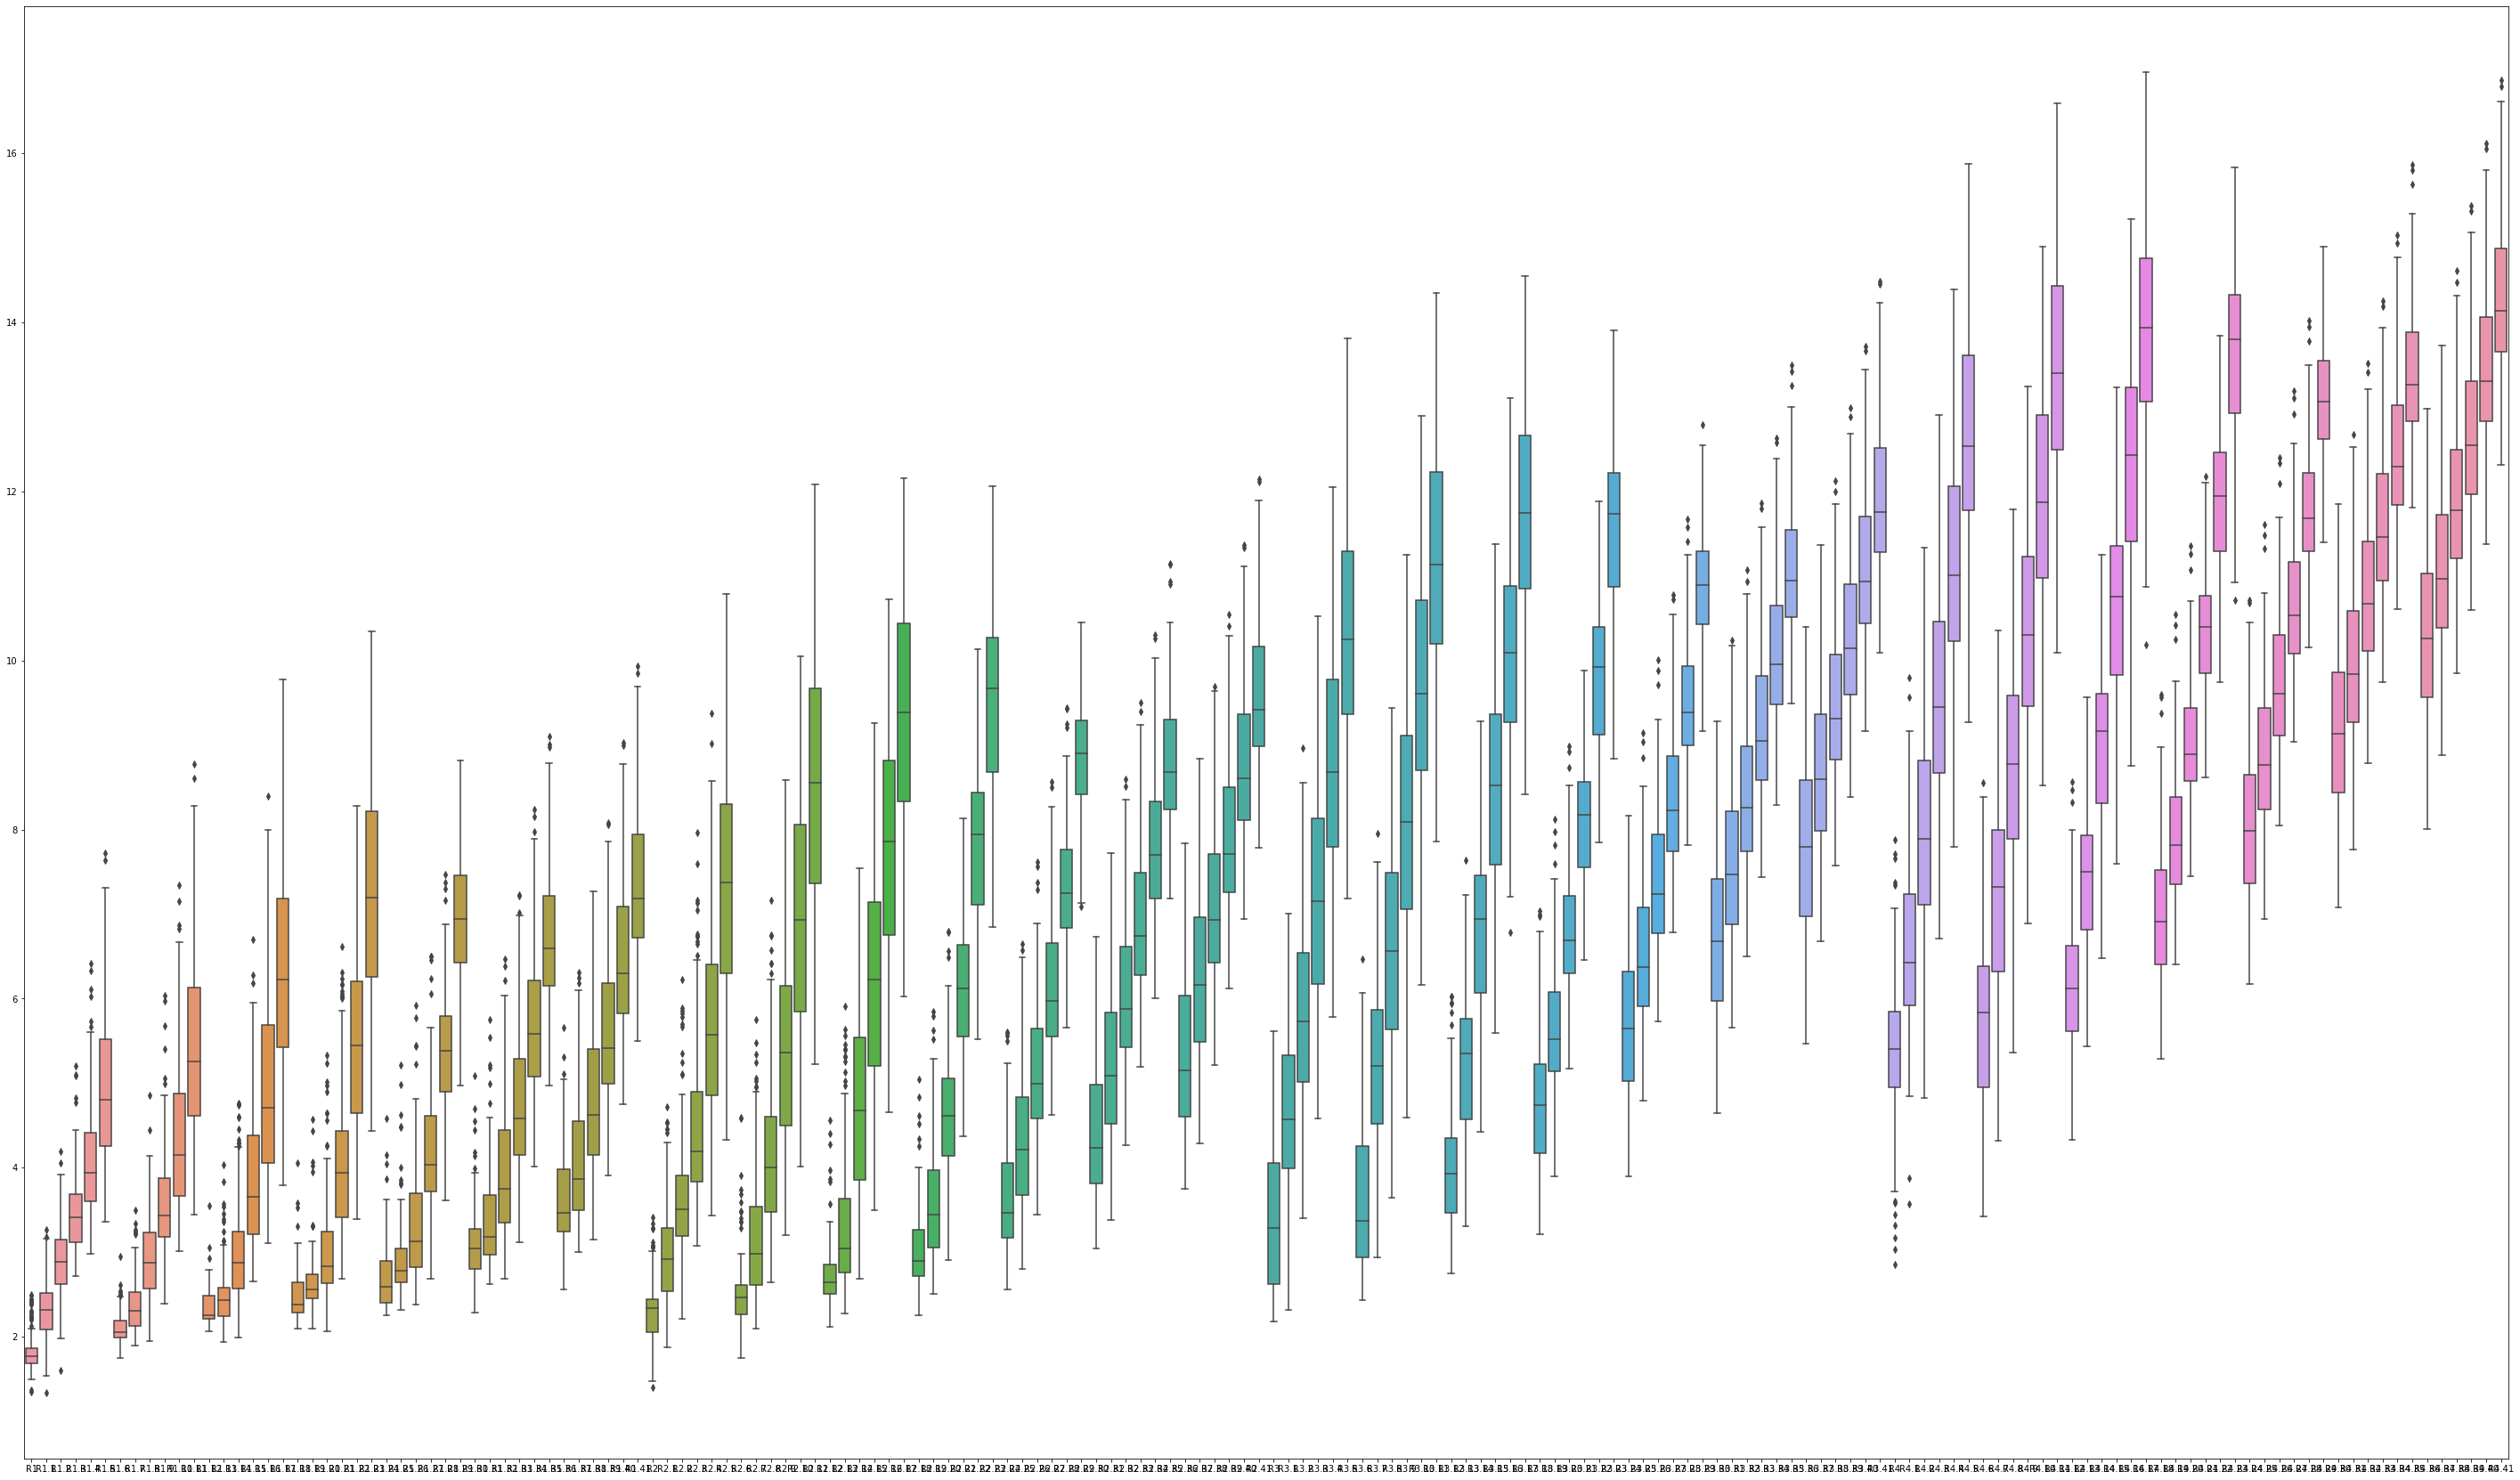

In [31]:
plt.figure(figsize=(50, 30))
sns.boxplot( data=df1_1.iloc[:, 4:172])
# add stripplot
# ax = sns.stripplot(data=df[df, color="orange", jitter=0.2, size=2.5)
# # add title
# plt.title("Boxplot with jitter", loc="left")

# Annotated features:

In [32]:
# split the data into inputs and outputs
R = df1_1.iloc[:, 4:172].values
P = df1_1.iloc[:, 172:340].values
DOD = df1_1.iloc[:, 340:508].values

In [33]:
R1 = df1_1.iloc[:, 4:46].values
R2 = df1_1.iloc[:, 46:88].values
R3 = df1_1.iloc[:, 88:130].values
R4 = df1_1.iloc[:, 130:172].values

In [34]:
R

array([[ 1.61,  1.83,  2.51, ..., 12.11, 12.84, 13.62],
       [ 2.4 ,  2.96,  3.42, ..., 13.81, 14.59, 15.43],
       [ 2.13,  2.58,  3.4 , ..., 13.11, 13.91, 14.77],
       ...,
       [ 1.59,  1.82,  2.26, ..., 11.88, 12.82, 13.65],
       [ 1.71,  2.15,  2.99, ..., 12.53, 13.25, 14.08],
       [ 1.66,  1.92,  2.39, ..., 11.29, 12.06, 12.9 ]])

In [35]:
P

array([[ 1.61,  1.83,  2.51, ..., 12.11, 12.84, 13.62],
       [ 2.4 ,  2.96,  3.42, ..., 13.81, 14.59, 15.43],
       [ 2.13,  2.58,  3.4 , ..., 13.11, 13.91, 14.77],
       ...,
       [ 1.59,  1.82,  2.26, ..., 11.88, 12.82, 13.65],
       [ 1.71,  2.15,  2.99, ..., 12.53, 13.25, 14.08],
       [ 1.66,  1.92,  2.39, ..., 11.29, 12.06, 12.9 ]])

In [36]:
DOD

array([[ 1.61,  1.94,  2.31, ..., 12.05, 12.63, 13.62],
       [ 2.4 ,  2.3 ,  2.41, ..., 14.25, 14.48, 15.43],
       [ 2.13,  2.35,  2.59, ..., 13.51, 13.8 , 14.77],
       ...,
       [ 1.59,  1.75,  2.15, ..., 12.37, 12.73, 13.65],
       [ 1.71,  2.  ,  2.27, ..., 12.59, 13.1 , 14.08],
       [ 1.66,  1.82,  2.17, ..., 12.47, 12.17, 12.9 ]])

In [37]:
df1_1['avg_R1'] = df1_1.iloc[:, 4:46].values.mean(axis=1)
df1_1['avg_R2'] = df1_1.iloc[:, 46:88].values.mean(axis=1)
df1_1['avg_R3'] = df1_1.iloc[:, 88:130].values.mean(axis=1)
df1_1['avg_R4'] = df1_1.iloc[:, 130:172].values.mean(axis=1)

In [38]:
df1_1['avg_P2'] = df1_1.iloc[:, 172:196].values.mean(axis=1)
df1_1['avg_P4'] = df1_1.iloc[:, 196:220].values.mean(axis=1)
df1_1['avg_P6'] = df1_1.iloc[:, 220:244].values.mean(axis=1)
df1_1['avg_P8'] = df1_1.iloc[:, 244:268].values.mean(axis=1)
df1_1['avg_P10'] = df1_1.iloc[:, 268:292].values.mean(axis=1)
df1_1['avg_P12'] = df1_1.iloc[:, 292:316].values.mean(axis=1)
df1_1['avg_P14'] = df1_1.iloc[:, 316:340].values.mean(axis=1)

In [39]:
df1_1['avg_DOD3.5'] = df1_1.iloc[:, 340:368].values.mean(axis=1)
df1_1['avg_DOD4'] = df1_1.iloc[:, 368:396].values.mean(axis=1)
df1_1['avg_DOD4.5'] = df1_1.iloc[:, 396:424].values.mean(axis=1)
df1_1['avg_DOD5'] = df1_1.iloc[:, 424:452].values.mean(axis=1)
df1_1['avg_DOD5.5'] = df1_1.iloc[:, 452:480].values.mean(axis=1)
df1_1['avg_DOD6'] = df1_1.iloc[:, 480:508].values.mean(axis=1)


In [40]:
df1_1.head()

,Length,OD,ID,WT,R1,R1.1,R1.2,R1.3,R1.4,R1.5,...,avg_P8,avg_P10,avg_P12,avg_P14,avg_DOD3.5,avg_DOD4,avg_DOD4.5,avg_DOD5,avg_DOD5.5,avg_DOD6
0,16.02,4.00,3.24,0.86,1.61,1.83,2.51,3.07,3.46,4.25,...,6.185000,6.360833,7.148333,8.105833,4.095357,4.799643,5.685714,6.735357,7.921071,9.219286
1,13.44,3.46,2.66,0.82,2.40,2.96,3.42,3.82,4.75,5.98,...,8.302917,8.158333,8.863333,9.885417,5.677857,6.589643,7.617500,8.830000,10.133929,11.517500
2,14.63,3.86,2.61,0.83,2.13,2.58,3.40,3.89,4.41,5.64,...,7.661667,7.540000,8.203333,9.186250,5.115000,5.965357,6.994643,8.206429,9.532500,10.940714
3,16.08,4.02,3.38,0.92,1.59,1.79,2.47,2.88,3.31,3.90,...,6.047917,6.133750,6.870417,7.816667,3.973929,4.610714,5.437500,6.439286,7.592500,8.867143
4,16.03,4.70,3.50,1.00,1.65,1.98,2.39,3.06,3.42,3.95,...,5.752917,6.016250,6.205000,6.980833,3.517500,4.208214,4.990714,5.905000,7.003571,8.282857


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


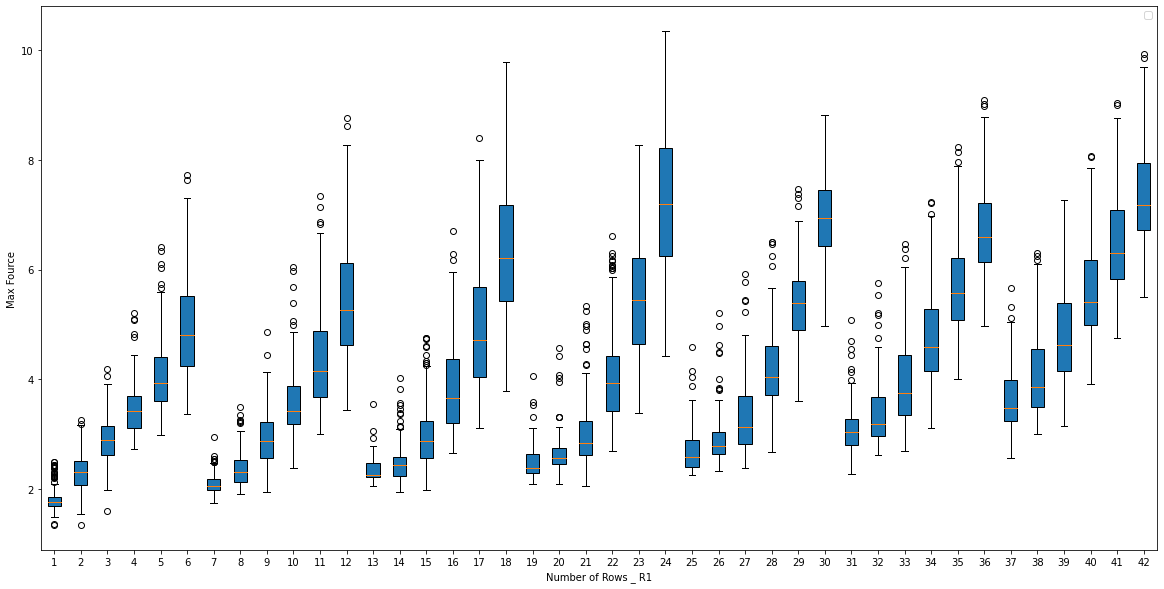

In [41]:
plt.figure(figsize=(20, 10))

plt.boxplot(R1,vert=True,patch_artist=True);   
plt.xlabel('Number of Rows _ R1')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


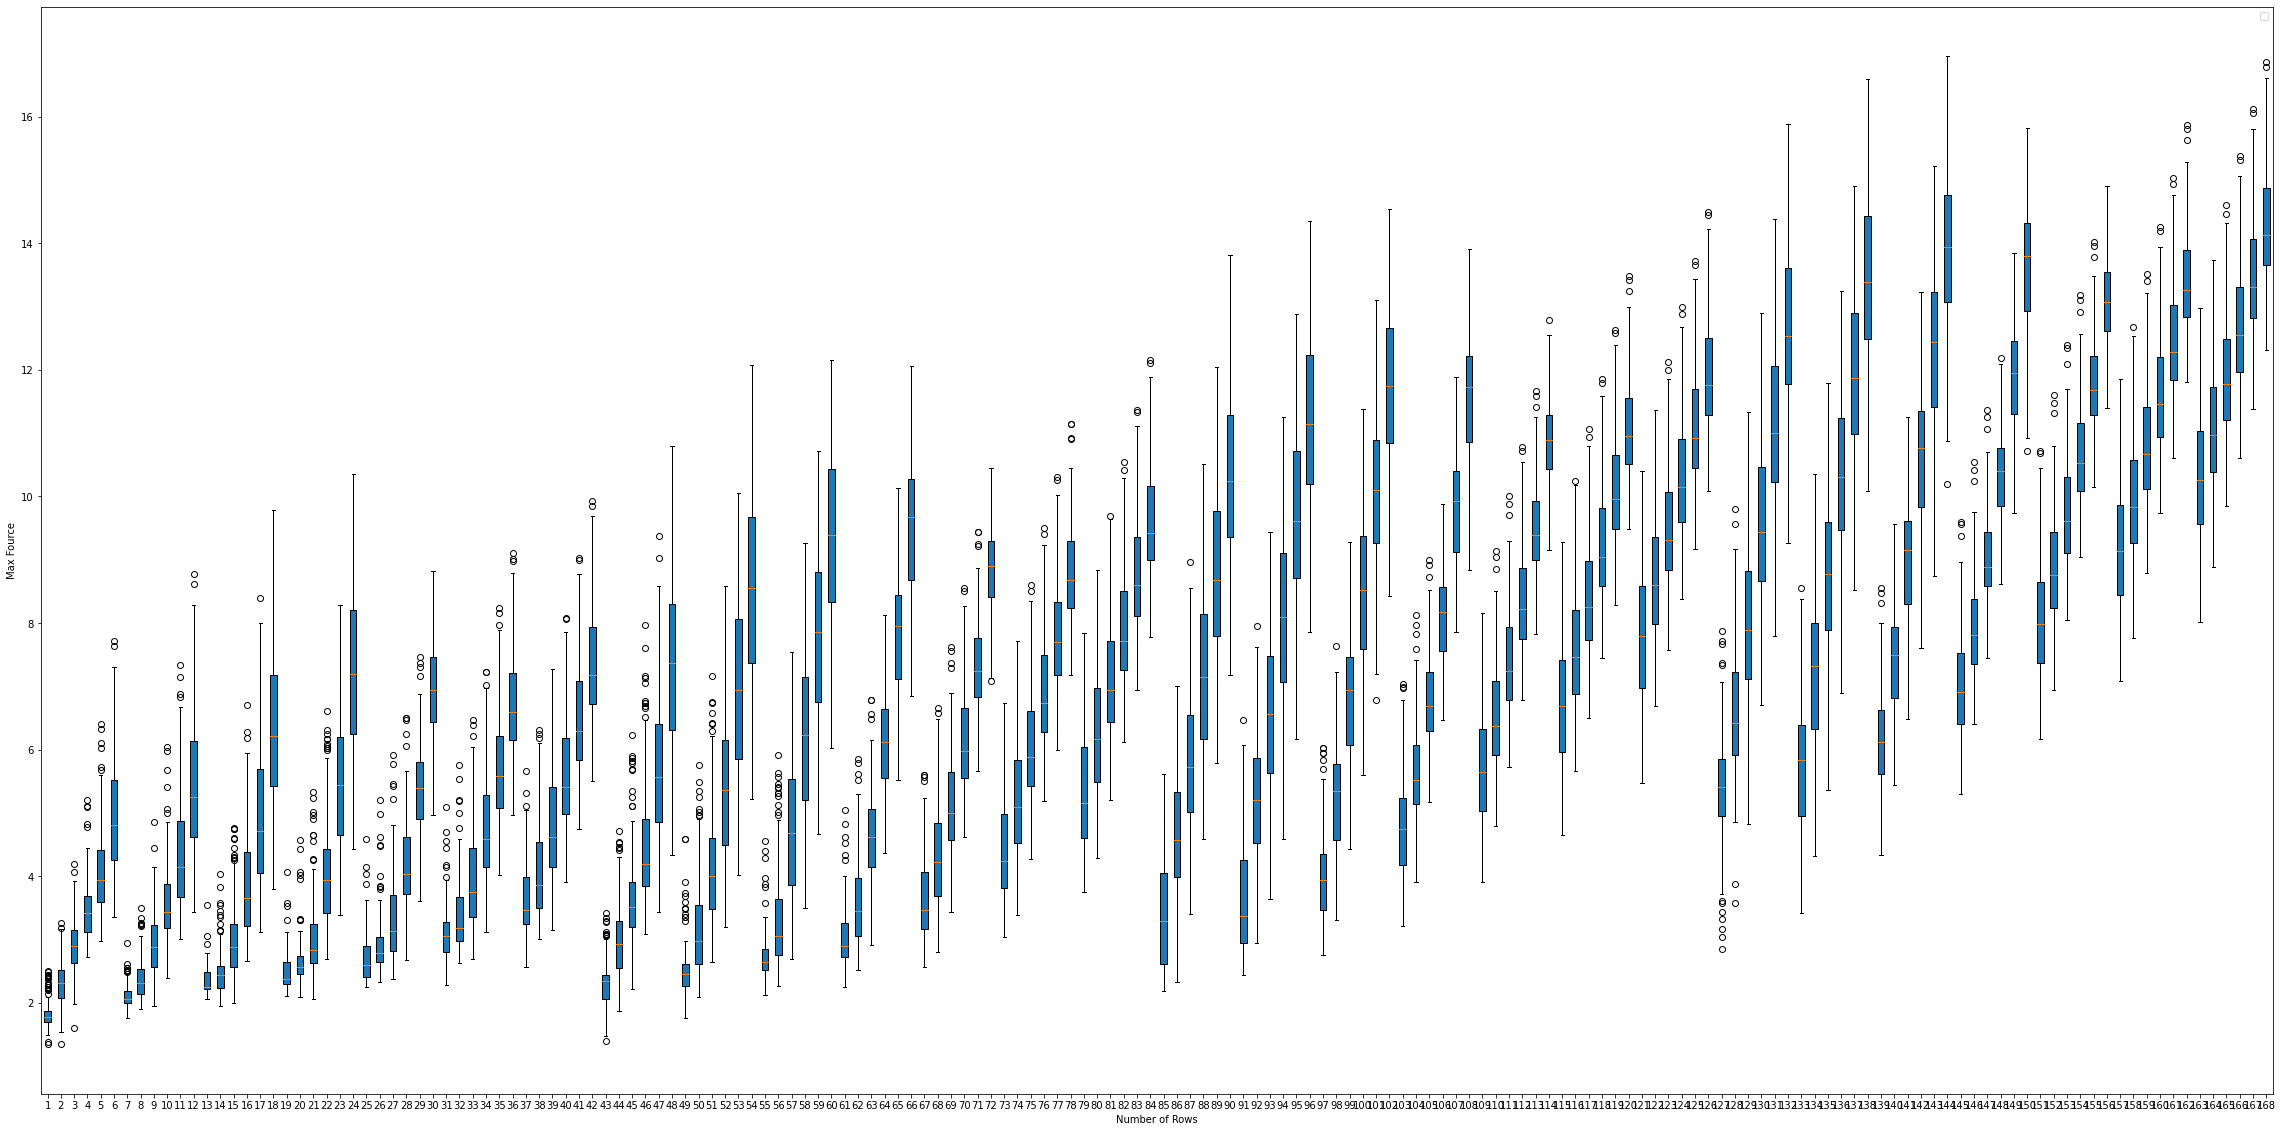

In [42]:
plt.figure(figsize=(40, 20))

plt.boxplot(R,vert=True,patch_artist=True);   
plt.xlabel('Number of Rows')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


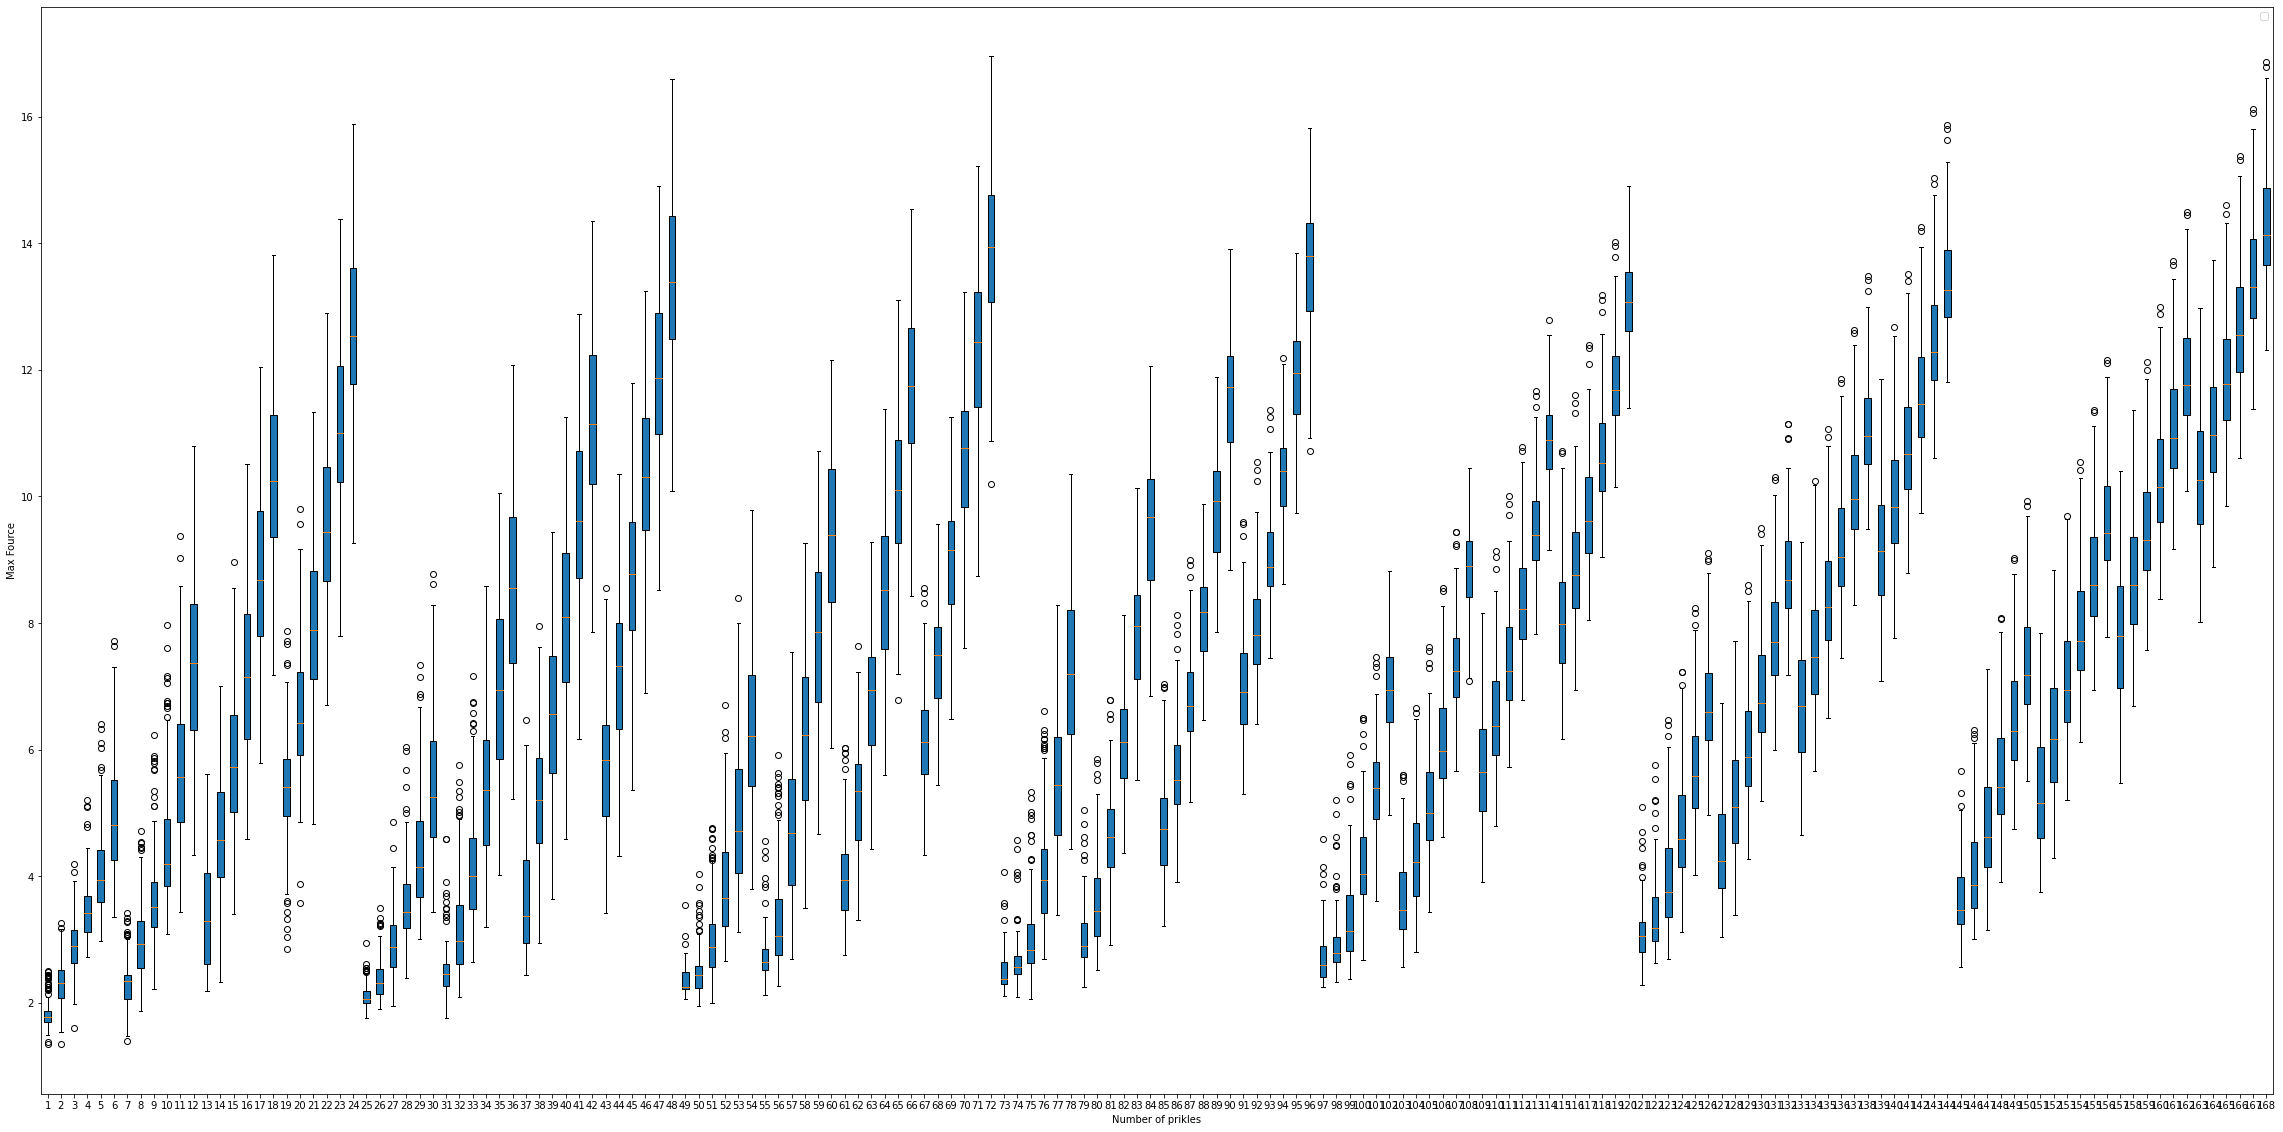

In [43]:
plt.figure(figsize=(40, 20))

plt.boxplot(P,vert=True,patch_artist=True);   
plt.xlabel('Number of prikles')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


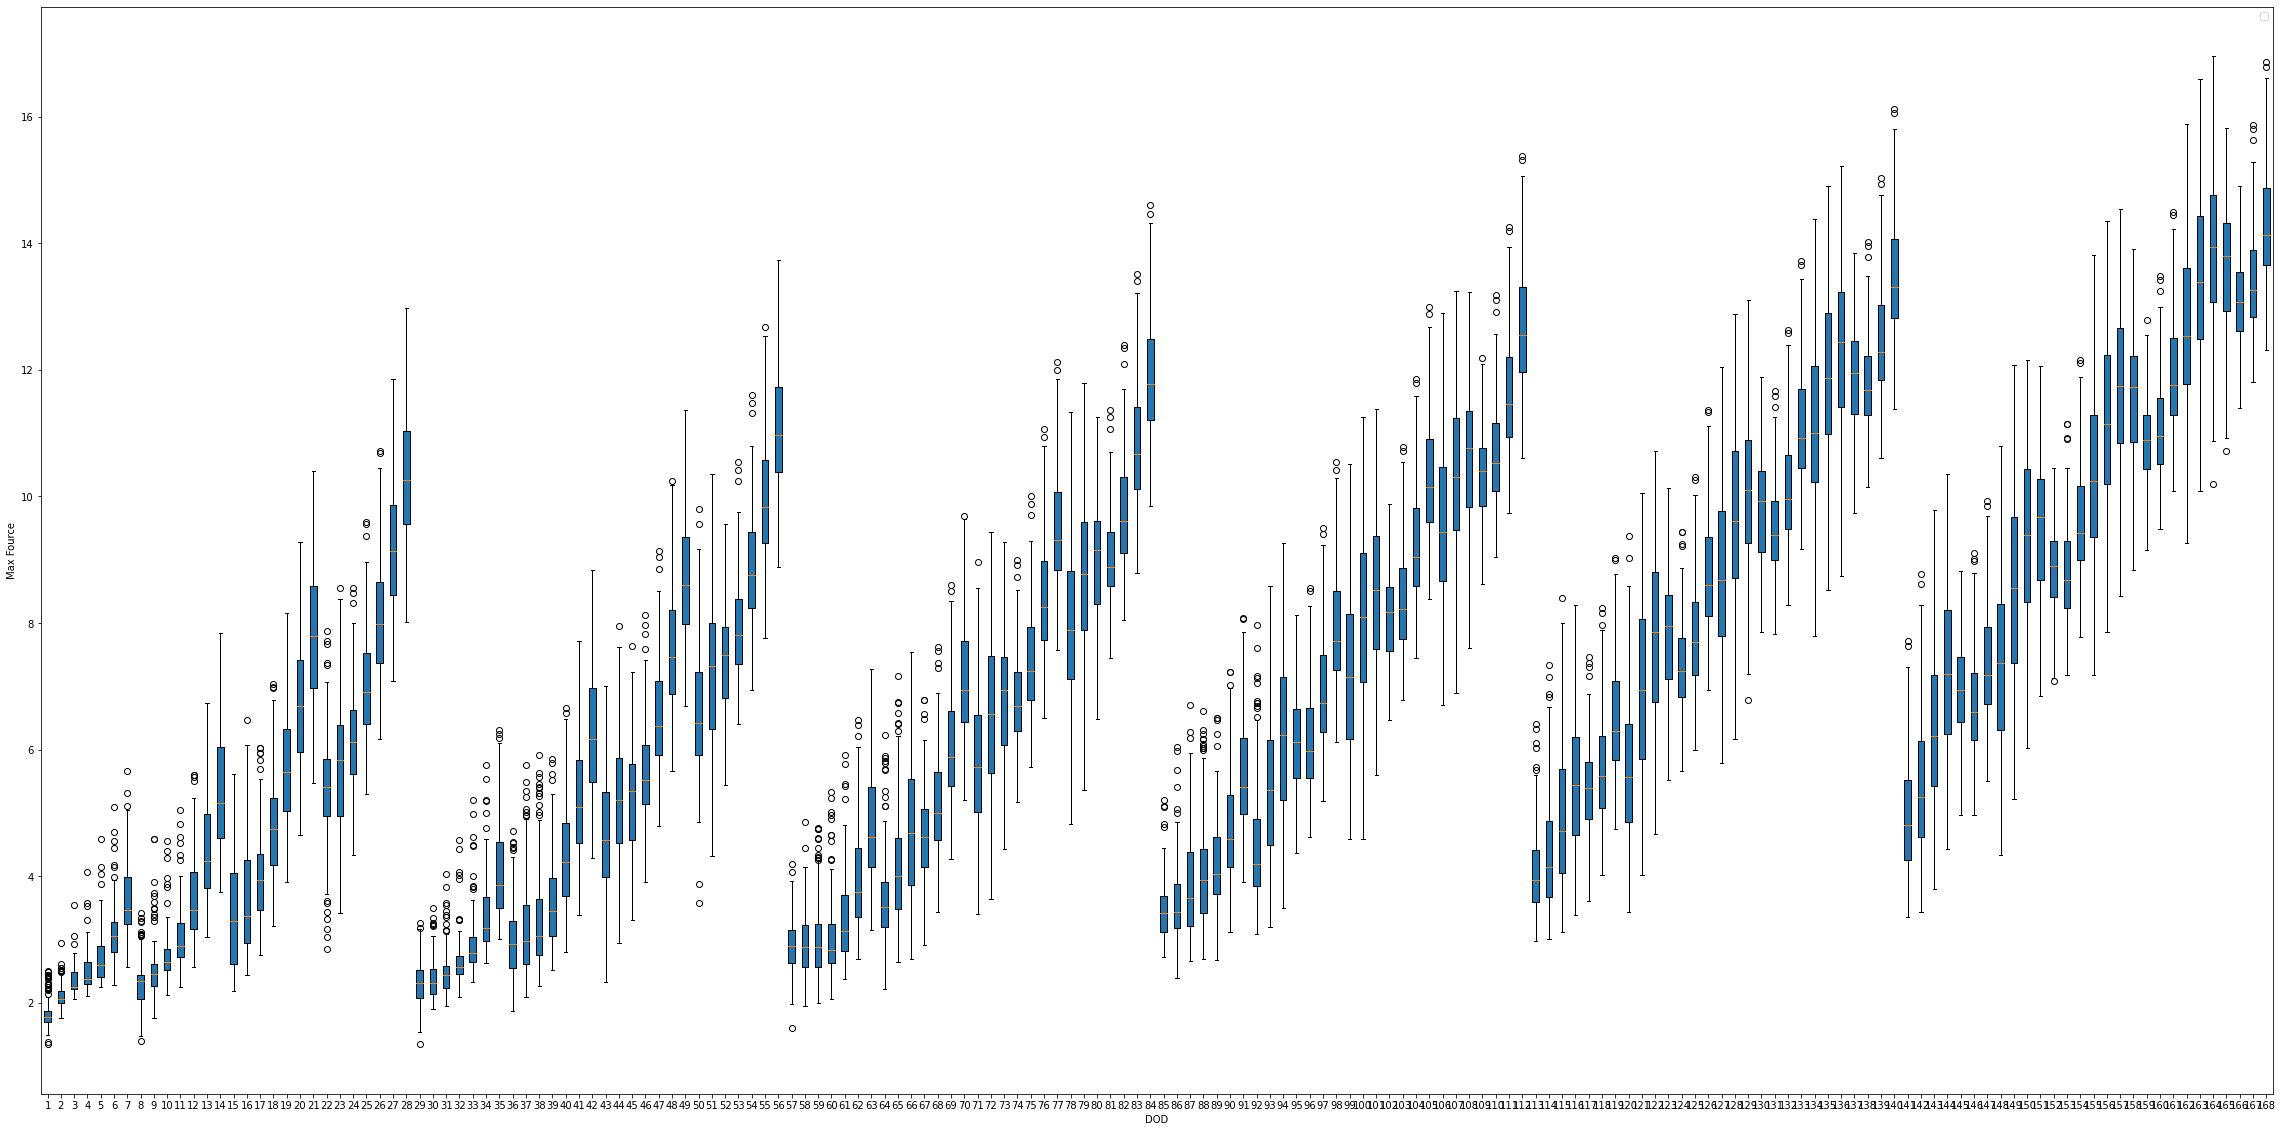

In [44]:
plt.figure(figsize=(40, 20))

plt.boxplot(DOD,vert=True,patch_artist=True);   
plt.xlabel('DOD')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

In [45]:
df1_1_avg = df1_1.drop(df1_1.iloc[:, 4:508], axis=1)
df1_1_avg.head()

,Length,OD,ID,WT,cluster,avg_R1,avg_R2,avg_R3,avg_R4,avg_P2,...,avg_P8,avg_P10,avg_P12,avg_P14,avg_DOD3.5,avg_DOD4,avg_DOD4.5,avg_DOD5,avg_DOD5.5,avg_DOD6
0,16.02,4.00,3.24,0.86,1,3.533810,5.080476,7.355238,9.668095,5.069583,...,6.185000,6.360833,7.148333,8.105833,4.095357,4.799643,5.685714,6.735357,7.921071,9.219286
1,13.44,3.46,2.66,0.82,1,5.037619,7.247143,9.504048,11.788810,7.198333,...,8.302917,8.158333,8.863333,9.885417,5.677857,6.589643,7.617500,8.830000,10.133929,11.517500
2,14.63,3.86,2.61,0.83,1,4.629048,6.626667,8.842619,11.071429,6.699583,...,7.661667,7.540000,8.203333,9.186250,5.115000,5.965357,6.994643,8.206429,9.532500,10.940714
3,16.08,4.02,3.38,0.92,1,3.335476,4.830238,7.065000,9.383333,4.794167,...,6.047917,6.133750,6.870417,7.816667,3.973929,4.610714,5.437500,6.439286,7.592500,8.867143
4,16.03,4.70,3.50,1.00,1,3.196667,4.462619,6.352619,8.593333,4.487500,...,5.752917,6.016250,6.205000,6.980833,3.517500,4.208214,4.990714,5.905000,7.003571,8.282857


In [46]:
df1_1_just_avg = df1_1.drop(df1_1.iloc[:, 3:508], axis=1)
df1_1_just_avg = df1_1_just_avg.drop(df1_1.iloc[:, 0:1], axis=1)

df1_1_just_avg.head()

,OD,ID,cluster,avg_R1,avg_R2,avg_R3,avg_R4,avg_P2,avg_P4,avg_P6,avg_P8,avg_P10,avg_P12,avg_P14,avg_DOD3.5,avg_DOD4,avg_DOD4.5,avg_DOD5,avg_DOD5.5,avg_DOD6
0,4.00,3.24,1,3.533810,5.080476,7.355238,9.668095,5.069583,5.748333,6.247917,6.185000,6.360833,7.148333,8.105833,4.095357,4.799643,5.685714,6.735357,7.921071,9.219286
1,3.46,2.66,1,5.037619,7.247143,9.504048,11.788810,7.198333,7.926250,8.426250,8.302917,8.158333,8.863333,9.885417,5.677857,6.589643,7.617500,8.830000,10.133929,11.517500
2,3.86,2.61,1,4.629048,6.626667,8.842619,11.071429,6.699583,7.412500,7.843750,7.661667,7.540000,8.203333,9.186250,5.115000,5.965357,6.994643,8.206429,9.532500,10.940714
3,4.02,3.38,1,3.335476,4.830238,7.065000,9.383333,4.794167,5.431667,5.980000,6.047917,6.133750,6.870417,7.816667,3.973929,4.610714,5.437500,6.439286,7.592500,8.867143
4,4.70,3.50,1,3.196667,4.462619,6.352619,8.593333,4.487500,4.844167,5.272500,5.752917,6.016250,6.205000,6.980833,3.517500,4.208214,4.990714,5.905000,7.003571,8.282857


In [47]:
df1_1_just_avg.iloc[:, 3:7].values

array([[ 3.53380952,  5.08047619,  7.3552381 ,  9.66809524],
       [ 5.03761905,  7.24714286,  9.50404762, 11.78880952],
       [ 4.62904762,  6.62666667,  8.84261905, 11.07142857],
       [ 3.33547619,  4.8302381 ,  7.065     ,  9.38333333],
       [ 3.19666667,  4.46261905,  6.35261905,  8.59333333],
       [ 4.74571429,  6.87333333,  9.18357143, 11.45714286],
       [ 3.77857143,  5.34071429,  7.5447619 ,  9.9252381 ],
       [ 5.54095238,  7.10809524,  9.32238095, 11.54642857],
       [ 4.3197619 ,  6.20571429,  8.55833333, 10.91928571],
       [ 3.29047619,  4.77952381,  6.87214286,  8.9947619 ],
       [ 4.23404762,  6.05071429,  8.18309524, 10.43761905],
       [ 3.32190476,  4.72142857,  6.7397619 ,  8.985     ],
       [ 3.95261905,  5.6997619 ,  7.83142857, 10.14261905],
       [ 3.73214286,  5.37595238,  7.47285714,  9.68547619],
       [ 3.64119048,  4.87928571,  6.85619048,  9.20357143],
       [ 3.7147619 ,  5.2502381 ,  7.54452381,  9.95738095],
       [ 4.46238095,  6.

In [48]:
df1_1_just_avg.iloc[:, 7:14].values

array([[5.06958333, 5.74833333, 6.24791667, ..., 6.36083333, 7.14833333,
        8.10583333],
       [7.19833333, 7.92625   , 8.42625   , ..., 8.15833333, 8.86333333,
        9.88541667],
       [6.69958333, 7.4125    , 7.84375   , ..., 7.54      , 8.20333333,
        9.18625   ],
       ...,
       [4.83208333, 5.29625   , 5.86375   , ..., 6.32083333, 6.93625   ,
        7.76083333],
       [5.6225    , 6.30708333, 6.7425    , ..., 6.79125   , 7.56791667,
        8.54208333],
       [4.5475    , 4.9325    , 5.41166667, ..., 6.09166667, 6.44      ,
        7.27291667]])

In [49]:
df1_1_just_avg.iloc[:, 14:20].values

array([[ 4.09535714,  4.79964286,  5.68571429,  6.73535714,  7.92107143,
         9.21928571],
       [ 5.67785714,  6.58964286,  7.6175    ,  8.83      , 10.13392857,
        11.5175    ],
       [ 5.115     ,  5.96535714,  6.99464286,  8.20642857,  9.5325    ,
        10.94071429],
       [ 3.97392857,  4.61071429,  5.4375    ,  6.43928571,  7.5925    ,
         8.86714286],
       [ 3.5175    ,  4.20821429,  4.99071429,  5.905     ,  7.00357143,
         8.28285714],
       [ 5.37928571,  6.24642857,  7.29214286,  8.48892857,  9.79785714,
        11.185     ],
       [ 4.09214286,  4.91857143,  5.92071429,  7.06357143,  8.2675    ,
         9.62142857],
       [ 5.66892857,  6.63142857,  7.70392857,  8.84428571, 10.065     ,
        11.36321429],
       [ 4.83357143,  5.71928571,  6.7675    ,  7.92035714,  9.19964286,
        10.56428571],
       [ 3.88285714,  4.49678571,  5.23214286,  6.25035714,  7.365     ,
         8.67821429],
       [ 4.6675    ,  5.47071429,  6.435     ,  7.

In [50]:
df1_1_just_avg["avg_R"] = df1_1_just_avg.iloc[:, 3:7].values.mean(axis=1)
df1_1_just_avg["avg_P"] = df1_1_just_avg.iloc[:, 7:14].values.mean(axis=1)
df1_1_just_avg["avg_DOD"] = df1_1_just_avg.iloc[:, 14:20].values.mean(axis=1)

Text(0.0, 1.0, 'Boxplot with jitter')

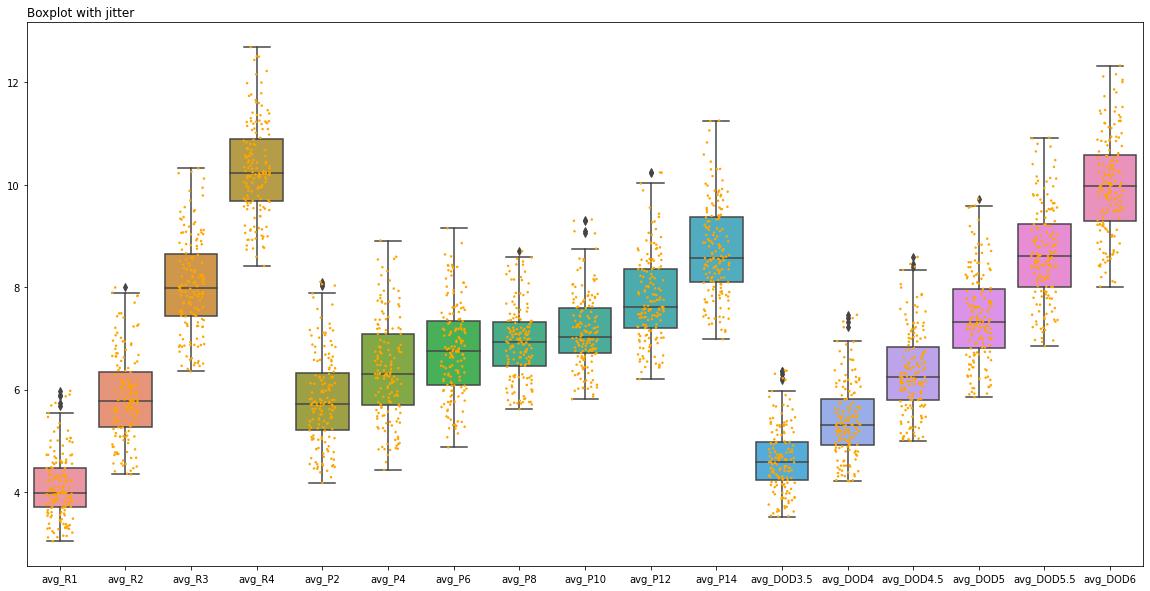

In [51]:
plt.figure(figsize=(20, 10))
sns.boxplot( data=df1_1_just_avg.iloc[:, 3:20])
# add stripplot
ax = sns.stripplot(data=df1_1_just_avg.iloc[:, 3:20], color="orange", jitter=0.2, size=2.5)
# add title
plt.title("Boxplot with jitter", loc="left")

Text(0.0, 1.0, 'Boxplot with jitter')

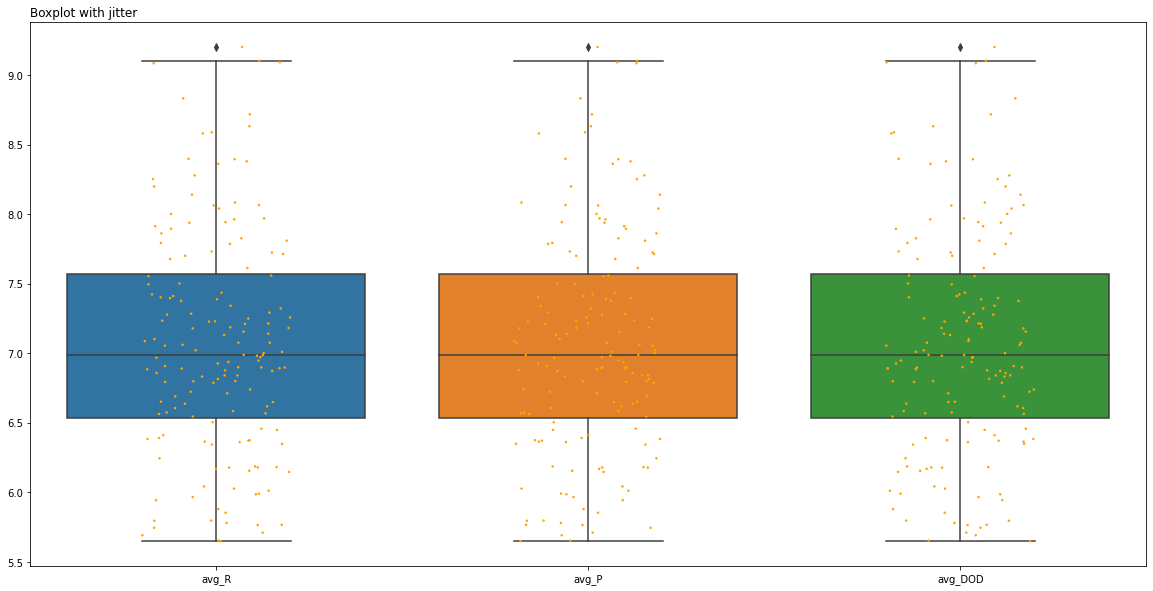

In [52]:
plt.figure(figsize=(20, 10))
sns.boxplot( data=df1_1_just_avg.iloc[:, 20:])
# add stripplot
ax = sns.stripplot(data=df1_1_just_avg.iloc[:, 20:], color="orange", jitter=0.2, size=2.5)
# add title
plt.title("Boxplot with jitter", loc="left")